In [ ]:
import shutil

folder_path = 'results/T5_SMALL_TOP_5_DOCS'  # Path to the folder you want to zip
zip_filename = 'T5_SMALL_TOP_5_DOCS'  # Desired name for the zip file

shutil.make_archive(zip_filename, 'zip', folder_path)

In [ ]:
import shutil

folder_path = 'results/T5_Tiny_TOP_5_DOCS'  # Path to the folder you want to zip
zip_filename = 'T5_Tiny_TOP_5_DOCS'  # Desired name for the zip file

shutil.make_archive(zip_filename, 'zip', folder_path)

## Take top 20 docs form queries top doc

In [1]:
import json

# Load your original JSON
with open("initial_query_qrels.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [5]:
new_data = {}

for idx, (sentence, docs) in enumerate(data.items()):
    top_20 = docs[:20]
    cleaned_docs = [{"0": doc[1], "1": doc[2]} for doc in top_20]
    
    new_data[str(idx)] = {
        "query": sentence,
        "top_docs": cleaned_docs
    }

# Save to new file
with open("initial_query_qrels_top20.json", "w", encoding="utf-8") as f:
    json.dump(new_data, f, ensure_ascii=False, indent=2)

In [1]:
import json

# Load the restructured file
with open("initial_query_qrels_top20.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Get all items as list of tuples
items = list(data.items())
midpoint = len(items) // 2

# Split into two halves
first_half = dict(items[:midpoint])
second_half = dict(items[midpoint:])

# Write each half to a separate file
with open("initial_query_qrels_hiba_top20.json", "w", encoding="utf-8") as f1:
    json.dump(first_half, f1, ensure_ascii=False, indent=2)

with open("initial_query_qrels_kajitha_top20.json", "w", encoding="utf-8") as f2:
    json.dump(second_half, f2, ensure_ascii=False, indent=2)

## merge traductions


In [15]:
import json

input_files = ["initial_query_qrels_hiba_top20_fr.json","initial_query_qrels_kajitha_top20_fr.json"
]

merged_data = {}

for file in input_files:
    with open(file, 'r', encoding='utf-8') as f:
        data = json.load(f)
        if not isinstance(data, dict):
            raise ValueError(f"{file} does not contain a JSON object.")
        merged_data.update(data)


# Save to a new file
with open('initial_query_qrels_top20_fr.json', 'w', encoding='utf-8') as f:
    json.dump(merged_data, f, indent=2, ensure_ascii=False)

In [ ]:
import json

input_files = ['qulac_top_documents_fr_tmp_top20_0to29.json','merged_top_20_fr_29to700.json']
merged_data = {}

for file in input_files:
    with open(file, 'r', encoding='utf-8') as f:
        data = json.load(f)
        if not isinstance(data, dict):
            raise ValueError(f"{file} does not contain a JSON object.")
        merged_data.update(data)


# Save to a new file
with open('top20_queries_FR.json', 'w', encoding='utf-8') as f:
    json.dump(merged_data, f, indent=2, ensure_ascii=False)

print("Saved ")

In [3]:
with open("training_top20_qulac_FR_noduplicates.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Trim top_docs to top 20
for key, entry in data.items():
    entry["top_docs"] = entry["top_docs"][:5]

# Save to new file
with open("training_top5_qulac_FR_noduplicates.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=2, ensure_ascii=False)

print("Saved new file FRRR with only top 5 docs per query.")

Saved new file FRRR with only top 5 docs per query.


## split english adatset to top 20 isntead fo top 50

In [10]:
with open("qulac_top_documents_en_top50.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Trim top_docs to top 20
for key, entry in data.items():
    entry["top_docs"] = entry["top_docs"][:20]

# Save to new file
with open("qulac_top_documents_en_top20_output.json", "w", encoding="utf-8") as f:
    json.dump(data, f, indent=2, ensure_ascii=False)

print("Saved new file with only top 20 docs per query.")

Saved new file with only top 20 docs per query.


In [12]:
## cerate a doc that has (query, top_docs of query, facet)

In [13]:
import json

# Load File 1 (queries and their top docs)
with open("initial_query_qrels_top20.json", "r", encoding="utf-8") as f:
    queries_data = json.load(f)

# Load File 2 (queries and clarifying questions)
with open("qulac_top_documents_en_top20.json", "r", encoding="utf-8") as f:
    clarifications_data = json.load(f)
final_output = {}

new_id = 0

# Loop through each query in File 1
for query_id, query_info in queries_data.items():
    query = query_info["query"]
    top_docs = query_info["top_docs"]

    # Find all matching clarifications in File 2 for the same query
    for clarif_qid, clarif_info in clarifications_data.items():
        if clarif_info["query"] == query:
            # For each match, create a new entry with a new ID
            final_output[new_id] = {
                "query": query,
                "top_docs": top_docs,
                "facet": clarif_info["facet"],
                "top_docs_clarif":clarif_info["top_docs"]
            }
            new_id += 1  # Increment the ID for the next entry

# Save to a new JSON file with new IDs
with open("training_top20_qulac_en.json", "w", encoding="utf-8") as f:
    json.dump(final_output, f, indent=2, ensure_ascii=False)

print(f"Saved {len(final_output)} entries to 'final_output.json'.")


Saved 717 entries to 'final_output.json'.


In [14]:
#handle dupliactes

In [15]:

with open("training_top20_qulac_en.json", "r", encoding="utf-8") as f:
    clarifications_data = json.load(f)

# Prepare the final output data
final_output = {}

# New ID counter
new_id = 0

# Loop through each entry in the file
for clarif_qid, clarif_info in clarifications_data.items():
    query = clarif_info["query"]
    clarification = clarif_info["facet"]

    # If the clarification is the same as the query, skip the entry
    if query == clarification:
        continue

    # Otherwise, add the entry with a new ID
    final_output[new_id] = {
        "query": query,
        "top_docs": clarif_info["top_docs"],
        "facet": clarification,
        "top_docs_clarif": clarif_info["top_docs_clarif"],
    }
    new_id += 1  # Increment the ID for the next entry

# Save to a new JSON file with new IDs
with open("training_top20_qulac_en_noduplicates.json", "w", encoding="utf-8") as f:
    json.dump(final_output, f, indent=2, ensure_ascii=False)

print(f"Saved {len(final_output)} entries to 'training_top20_qulac_en_noduplicates.json'.")


Saved 599 entries to 'training_top20_qulac_en_noduplicates.json'.


## preprcoess to kep only the input and output, and ditch the clarif docs and the rankings

In [17]:


# Load the input file containing queries, top docs, and clarifications
with open("training_top20_qulac_en_noduplicates.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Initialize an empty list to store preprocessed data
preprocessed_data = []

# Loop through the data
for entry_id, entry in data.items():
    query = entry["query"]
    top_docs = entry["top_docs"]
    
    # Create a string of documents (can concatenate or separate by spaces)
    docs = " ".join([doc["0"] for doc in top_docs])
    
    # Extract the clarification (output)
    clarification = entry["facet"]
    
    # Append to preprocessed data
    preprocessed_data.append({
        "input": query + " " + docs,  # Combine query with its top docs
        "output": clarification       # The clarification is the output
    })

# Save the preprocessed data to a new file
with open("training_top20_qulac_PREPRCOESSED_FOR_MODEL.json", "w", encoding="utf-8") as f:
    json.dump(preprocessed_data, f, indent=2, ensure_ascii=False)

print(f"Preprocessed data saved to 'training_top20_qulac_PREPRCOESSED_FOR_MODEL.json' with {len(preprocessed_data)} entries.")


Preprocessed data saved to 'training_top20_qulac_PREPRCOESSED_FOR_MODEL.json' with 599 entries.


## Keep top 5 docs isntead of top 20 

In [12]:
import json
with open("FOLD0_FR_training_top20_qulac_tfidf_CLEANED_rep.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Initialize an empty list to store preprocessed data
preprocessed_data = []

# Loop through the data
for entry_id, entry in data.items():
    query = entry["query"]
    top_docs = entry["top_docs"]
    
    # Format the documents with numbering and line breaks
    doc_lines = [f"[DOC {i + 1}] {doc.strip()}" for i, doc in enumerate(top_docs[:10])]
    formatted_docs = "\n".join(doc_lines)
    
    # Build the input string with clear separators
    input_text = f"[QUERY] {query}\n[DOCUMENTS]\n{formatted_docs}"
    
    # Extract the clarification (output)
    clarification = entry["facet"]
    
    # Append to preprocessed data
    preprocessed_data.append({
        "input": input_text,
        "output": clarification
    })

# Save the preprocessed data to a new file
with open("FOLD0_FR_training_top10_qulac_tfidf_CLEANED_rep_PREPROCESSED_FOR_MODEL.json", "w", encoding="utf-8") as f:
    json.dump(preprocessed_data, f, indent=2, ensure_ascii=False)

print(f"Preprocessed data saved to 'training_top10_qulac_PREPROCESSED_FOR_MODEL_LDA.json' with {len(preprocessed_data)} entries.")


Preprocessed data saved to 'training_top10_qulac_PREPROCESSED_FOR_MODEL_LDA.json' with 596 entries.


In [3]:
# take only top 5 
import json
with open("training_top20_qulac_PREPROCESSED_FOR_MODEL.json", "r", encoding="utf-8") as f:
    data = json.load(f)
for item in data:
    input_text = item["input"]
    cutoff_marker = "[DOC5]"
    if cutoff_marker in input_text:
        item["input"] = input_text.split(cutoff_marker)[0].strip()

# Save the modified JSON
with open("training_top5_qulac_PREPROCESSED_FOR_MODEL.json", "w") as f:
    json.dump(data, f, indent=2)

print(f"Preprocessed data saved to 'training_top5_qulac_PREPROCESSED_FOR_MODEL.json' with {len(data)} entries.")



Preprocessed data saved to 'training_top5_qulac_PREPROCESSED_FOR_MODEL.json' with 599 entries.


# keep only the query, ignore the docs 

In [2]:
# take only top 5 
import json
with open("FR_training_top5_qulac_PREPROCESSED_FOR_MODEL_TFIDF_CLEANED.json", "r", encoding="utf-8") as f:
    data = json.load(f)
for item in data:
    input_text = item["input"]
    cutoff_marker = "[DOCUMENTS]"
    
    if cutoff_marker in input_text:
        item["input"] = input_text.split(cutoff_marker)[0].strip().replace("[QUERY]", "").strip()

# Save the modified JSON
with open("FR_training_queryonly_qulac_PREPROCESSED_FOR_MODEL.json", "w") as f:
    json.dump(data, f, indent=2)

print(f"Preprocessed data saved to 'training_queryonly_qulac_PREPROCESSED_FOR_MODEL.json' with {len(data)} entries.")



Preprocessed data saved to 'training_queryonly_qulac_PREPROCESSED_FOR_MODEL.json' with 596 entries.


# Sumamrize the docs 

In [1]:
import json
from transformers import pipeline
from tqdm import tqdm
from transformers import AutoTokenizer

# Load original data
with open("FR_training_top20_qulac_noduplicates.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Load the tokenizer for the summarization model to handle chunking
tokenizer = AutoTokenizer.from_pretrained("mrm8488/camembert2camembert_shared-finetuned-french-summarization")

# Load the summarization model
summarizer = pipeline("summarization", model="mrm8488/camembert2camembert_shared-finetuned-french-summarization", framework="pt" )

# Maximum token length for the model
max_token_length = 1024

# Create a new list to store updated entries
summarized_data = []

# Go through each entry and summarize docs
for entry_id, entry in tqdm(data.items()):
    new_entry = dict(entry)
    query = entry["query"]
    top_docs = entry["top_docs"]
    new_top_docs = []

    for doc in top_docs[:5]:
        original_doc_text = doc["0"]
        doc_tokens = tokenizer.encode(original_doc_text, truncation=False)

        summaries = []
        for i in range(0, len(doc_tokens), max_token_length):
            
            chunk_tokens = doc_tokens[i:i + max_token_length]
            chunk = tokenizer.decode(chunk_tokens, skip_special_tokens=True).strip()
            
            if not chunk:  # Skip empty chunks
                continue
            
            try:
                summary_chunk = summarizer(chunk, max_length=150, min_length=20, do_sample=False)[0]["summary_text"]
                summaries.append(summary_chunk)
            except Exception as e:
                print(f"Error summarizing chunk: {e}")

        # Combine the summaries of the chunks (you might need a more sophisticated way to do this)
        combined_summary = " ".join(summaries)
        print("----------------------", combined_summary)
        summarized_doc = dict(doc)
        summarized_doc["0"] = combined_summary  # Replace the doc with the combined summary
        new_top_docs.append(summarized_doc)

    new_entry["top_docs"] = new_top_docs
   
    summarized_data.append(new_entry)

# Save to new file
with open("FR_training_top5_qulac_SUMMARIZED.json", "w", encoding="utf-8") as f:
    json.dump(summarized_data, f, indent=2, ensure_ascii=False)

print("Summarized version saved to 'training_top20_qulac_en_summarized_docs.json'")

2025-05-13 03:35:03.273625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747100103.295697   66023 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747100103.302639   66023 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747100103.319848   66023 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747100103.319864   66023 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1747100103.319866   66023 computation_placer.cc:177] computation placer alr

tokenizer_config.json:   0%|          | 0.00/265 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.51k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

ValueError: Could not load model mrm8488/camembert2camembert_shared-finetuned-french-summarization with any of the following classes: (<class 'transformers.models.auto.modeling_auto.AutoModelForSeq2SeqLM'>, <class 'transformers.models.encoder_decoder.modeling_encoder_decoder.EncoderDecoderModel'>). See the original errors:

while loading with AutoModelForSeq2SeqLM, an error is thrown:
Traceback (most recent call last):
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/pipelines/base.py", line 291, in infer_framework_load_model
    model = model_class.from_pretrained(model, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/models/auto/auto_factory.py", line 573, in from_pretrained
    return model_class.from_pretrained(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py", line 396, in from_pretrained
    return super().from_pretrained(pretrained_model_name_or_path, *model_args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/modeling_utils.py", line 272, in _wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/modeling_utils.py", line 4317, in from_pretrained
    checkpoint_files, sharded_metadata = _get_resolved_checkpoint_files(
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/modeling_utils.py", line 1130, in _get_resolved_checkpoint_files
    raise EnvironmentError(
OSError: mrm8488/camembert2camembert_shared-finetuned-french-summarization does not appear to have a file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt or flax_model.msgpack.

while loading with EncoderDecoderModel, an error is thrown:
Traceback (most recent call last):
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/pipelines/base.py", line 291, in infer_framework_load_model
    model = model_class.from_pretrained(model, **kwargs)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/models/encoder_decoder/modeling_encoder_decoder.py", line 396, in from_pretrained
    return super().from_pretrained(pretrained_model_name_or_path, *model_args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/modeling_utils.py", line 272, in _wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/modeling_utils.py", line 4317, in from_pretrained
    checkpoint_files, sharded_metadata = _get_resolved_checkpoint_files(
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/users/Etu0/21402600/.local/lib/python3.11/site-packages/transformers/modeling_utils.py", line 1130, in _get_resolved_checkpoint_files
    raise EnvironmentError(
OSError: mrm8488/camembert2camembert_shared-finetuned-french-summarization does not appear to have a file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt or flax_model.msgpack.




# preprocess summmarized top 5

In [26]:

with open("training_top20_qulac_en_summarized_docs.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Initialize an empty list to store preprocessed data
preprocessed_data = []

# Loop through the data
for entry in data:
    query = entry["query"]
    top_docs = entry["top_docs"]
    
    # Format the documents with numbering and line breaks
    doc_lines = [f"[DOC {i + 1}] {doc['0'].strip()}" for i, doc in enumerate(top_docs)]
    formatted_docs = "\n".join(doc_lines)
    
    # Build the input string with clear separators
    input_text = f"[QUERY] {query}\n[DOCUMENTS]\n{formatted_docs}"
    
    # Extract the clarification (output)
    clarification = entry["facet"]
    
    # Append to preprocessed data
    preprocessed_data.append({
        "input": input_text,
        "output": clarification
    })

# Save the preprocessed data to a new file
with open("training_top5_qulac_SUMMARIZED_FOR_MODEL.json", "w", encoding="utf-8") as f:
    json.dump(preprocessed_data, f, indent=2, ensure_ascii=False)

print(f"Preprocessed data saved to 'training_top5_qulac_SUMMARIZED_FOR_MODEL.json' with {len(preprocessed_data)} entries.")


Preprocessed data saved to 'training_top5_qulac_SUMMARIZED_FOR_MODEL.json' with 599 entries.


# FRENCH DATASET

## clean up the big full doc from 0 to 20, split into top 20.

In [4]:
with open("qulac_top_documents_fr_tmp.json", "r", encoding="utf-8") as f:
    data = json.load(f)

preprocessed_data = {}

# Trim top_docs to top 20
for key, entry in data.items():
    
    if int(key)<29:
        new_entry = dict(entry)
        new_entry["top_docs"] = entry["top_docs"][:20]
        
        preprocessed_data[key]=new_entry
        

# Save to new file
with open("qulac_top_documents_fr_tmp_top20_0to29.json", "w", encoding="utf-8") as f:
    json.dump(preprocessed_data, f, indent=2, ensure_ascii=False)

print("Saved new file with only top 20 docs per query.")

Saved new file with only top 20 docs per query.


## mix top 4 and top 20 in one file 

In [11]:
import json

# Load both files
with open('all_top0to4_queries_fr.json', 'r', encoding='utf-8') as f1, open('Merged_top4_to20_queries_fr.json', 'r', encoding='utf-8') as f2:
    data1 = json.load(f1)
    data2 = json.load(f2)

# Assume it's a dict with multiple queries (or just one), so iterate if needed
for key in data1:
    top_docs_0_4 = data1[key]["top_docs"]   # from 0 to 4
    top_docs_4_20 = data2[key]["top_docs"]  # from 5 to 20
    data1[key]["top_docs"] = top_docs_0_4 + top_docs_4_20

# Save the merged result
with open('merged_top_20_fr_29to700.json', 'w', encoding='utf-8') as f_out:
    json.dump(data1, f_out, ensure_ascii=False, indent=2)


# Merge intiail query docs and facet docs in FR

In [21]:
import json

# Load File 1 (queries and their top docs)
with open("initial_query_qrels_top20_fr.json", "r", encoding="utf-8") as f:
    queries_data = json.load(f)

# Load File 2 (queries and clarifying questions)
with open("top20_queries_FR.json", "r", encoding="utf-8") as f:
    clarifications_data = json.load(f)
final_output = {}

new_id = 0

# Loop through each query in File 1
for query_id, query_info in queries_data.items():
    query = query_info["query"]
    top_docs = query_info["top_docs"]
    print(query_id, query)
    # Find all matching clarifications in File 2 for the same query
    for clarif_qid, clarif_info in clarifications_data.items():
        if clarif_info["query"] == query:
            # For each match, create a new entry with a new ID
            final_output[new_id] = {
                "query": query,
                "top_docs": top_docs,
                "facet": clarif_info["facet"],
                "top_docs_clarif":clarif_info["top_docs"]
            }
            new_id += 1  # Increment the ID for the next entry

# Save to a new JSON file with new IDs
with open("training_top20_qulac_FR.json", "w", encoding="utf-8") as f:
    json.dump(final_output, f, indent=2, ensure_ascii=False)

print(f"Saved {len(final_output)} entries to 'final_output.json'.")


0 Trouvez des informations sur l' histoire familiale du président Barack Obama , y compris la généalogie , les origines nationales , les lieux et les dates de naissance , etc.
1 Trouvez des informations sur le French Lick Resort et Casino dans l' Indiana .
2 Trouvez des conseils , des ressources , des fournitures pour vous organiser et réduire le désordre .
3 Trouvez des informations sur l' achat , l' installation et la réparation des toilettes .
4 Trouvez des informations sur le Mitchell College de New London , dans le CT , comme celles qui pourraient être utiles à un étudiant .
5 Trouvez des informations sur le chemin de fer du sud de Kansas City .
6 Comment sont évaluées les valeurs des maisons ?
7 Je cherche des sources pour des pièces pour voitures , de préférence utilisées .
8 Je cherche un service Internet bon marché .
9 Je cherche des informations pour me préparer à l' examen GMAT .
10 Je cherche un discjocke .
11 Je cherche des sites de cartographie en ligne .
12 Je veux trouv

In [1]:
#delete duplicates
import json
with open("training_top20_qulac_FR.json", "r", encoding="utf-8") as f:
    clarifications_data = json.load(f)

# Prepare the final output data
final_output = {}

# New ID counter
new_id = 0

# Loop through each entry in the file
for clarif_qid, clarif_info in clarifications_data.items():
    query = clarif_info["query"]
    clarification = clarif_info["facet"]

    # If the clarification is the same as the query, skip the entry
    if query == clarification:
        continue

    # Otherwise, add the entry with a new ID
    final_output[new_id] = {
        "query": query,
        "top_docs": clarif_info["top_docs"],
        "facet": clarification,
        "top_docs_clarif": clarif_info["top_docs_clarif"],
    }
    new_id += 1  # Increment the ID for the next entry

# Save to a new JSON file with new IDs
with open("training_top20_qulac_FR_noduplicates.json", "w", encoding="utf-8") as f:
    json.dump(final_output, f, indent=2, ensure_ascii=False)

print(f"Saved {len(final_output)} entries to 'training_top20_qulac_fr_noduplicates.json'.")


Saved 596 entries to 'training_top20_qulac_fr_noduplicates.json'.


In [2]:

with open("training_top20_qulac_FR_noduplicates.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Initialize an empty list to store preprocessed data
preprocessed_data = []

# Loop through the data
for entry_id, entry in data.items():
    query = entry["query"]
    top_docs = entry["top_docs"]
    
    # Format the documents with numbering and line breaks
    doc_lines = [f"[DOC {i + 1}] {doc['0'].strip()}" for i, doc in enumerate(top_docs[:5])]
    formatted_docs = "\n".join(doc_lines)
    
    # Build the input string with clear separators
    input_text = f"[QUERY] {query}\n[DOCUMENTS]\n{formatted_docs}"
    
    # Extract the clarification (output)
    clarification = entry["facet"]
    
    # Append to preprocessed data
    preprocessed_data.append({
        "input": input_text,
        "output": clarification
    })

# Save the preprocessed data to a new file
with open("training_top5_qulac_FR_PREPROCESSED_FOR_MODEL.json", "w", encoding="utf-8") as f:
    json.dump(preprocessed_data, f, indent=2, ensure_ascii=False)

print(f"Preprocessed data saved to 'training_top5_qulac_FR_PREPROCESSED_FOR_MODEL.json' with {len(preprocessed_data)} entries.")


Preprocessed data saved to 'training_top5_qulac_FR_PREPROCESSED_FOR_MODEL.json' with 596 entries.


# generate the few shots examples:


In [18]:
import json
with open("FR_training_top20_qulac_tfidf_CLEANED_rep.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Initialize an empty list to store preprocessed data
preprocessed_data = []

# Loop through the data
for entry_id, entry in data.items():
    if(int(entry_id) in [24,59,95]):
        query = entry["query"]
        top_docs = entry["top_docs"]
        
        # Format the documents with numbering and line breaks
        doc_lines = [f"[DOC {i + 1}] {doc.strip()}" for i, doc in enumerate(top_docs[:5])]
        formatted_docs = "\n".join(doc_lines)
        
        # Build the input string with clear separators
        input_text = f"[QUERY] {query}\n[DOCUMENTS]\n{formatted_docs}"
        
        # Extract the clarification (output)
        clarification = entry["facet"]

        res= f"Input: {input_text} {{\"reformulated_query\":{clarification}}}"
        # Append to preprocessed data
        preprocessed_data.append(res)

print(preprocessed_data)
# Save the preprocessed data to a new file
with open("few_shot_examples_QULAC_FR.json", "w", encoding="utf-8") as f:
    json.dump("\n".join(preprocessed_data), f, indent=2, ensure_ascii=False)

print(f"Preprocessed data saved to 'few shots exmaple FR.json'.")


['Input: [QUERY] Je cherche un service Internet bon marché .\n[DOCUMENTS]\n[DOC 1] onspeed debit internet fournisseur hotel toucan haut fasthost talktalk londre bt service telephonique connexion acce telephone surftime sjg fai virgin\n[DOC 2] web quickonthenet site worldpay constructeur service propre entreprise solution client recrutemer design hebergement modele internet conception galerie watford chartered quick\n[DOC 3] appel voip internet telephonique pc service telephone telephonie international technologie passer utilisateur mobile phone communication distance voix protocol cout facile\n[DOC 4] internet fournisseur isp service acce ez dsl info dialup comparaison fai enter memaryland kylouisiana ohoklahoma nmnew ndohio skyukon mamichigan ezisp\n[DOC 5] petit gramme robot commande sortie moteur energie capteur puce led ls registre circuit roue gnd pouvoir ecole utiliser connecter bit {"reformulated_query":Quels sont les fournisseurs d\' Internet haut débit à bas prix ?}', 'Input: 

In [14]:
# Split datasets into train and tets to reuse them 

In [19]:
from sklearn.model_selection import train_test_split
def split(filename):
    with open(filename, "r", encoding="utf-8") as f:
        raw_data = json.load(f)
    
    # Split the raw data into train and validation sets (eval_data is a common term for validation)
    train_data, eval_data = train_test_split(raw_data, test_size=0.1, random_state=42) # Added random_state for reproducibility
    
    # Write the train data to a new JSON file
    train_filename = "TRAINSET_"+filename
    with open(train_filename, "w", encoding="utf-8") as f:
        json.dump(train_data, f, indent=2, ensure_ascii=False)
    
    # Write the evaluation data to a new JSON file
    eval_filename = "EVALSET_"+filename
    with open(eval_filename, "w", encoding="utf-8") as f:
        json.dump(eval_data, f, indent=2, ensure_ascii=False)
    
    print(f"Successfully split '{filename}' into '{train_filename}' and '{eval_filename}'.")
    print(f"Train data size: {len(train_data)}")
    print(f"Evaluation data size: {len(eval_data)}")

In [20]:
split("training_top10_qulac_PREPROCESSED_FOR_MODEL_TFIDF_CLEANED.json")

Successfully split 'training_top10_qulac_PREPROCESSED_FOR_MODEL_TFIDF_CLEANED.json' into 'TRAINSET_training_top10_qulac_PREPROCESSED_FOR_MODEL_TFIDF_CLEANED.json' and 'EVALSET_training_top10_qulac_PREPROCESSED_FOR_MODEL_TFIDF_CLEANED.json'.
Train data size: 539
Evaluation data size: 60


# ------------ Fix some issues in generated queries , like bad formatting

In [3]:
# take only top 5 
import json
import re
with open("FR_LLM_predictions_ZEROSHOT_QUERYONLY.jsonl", "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]
    
for item in data:
    predicted_text = item["predicted"]
    if "Je ne peux pas générer" in predicted_text or "I cannot generate" in predicted_text:
        print( item["predicted"])
        item["predicted"]="Generation Error"
    else:

        match = re.search(r'{"reformulated_query":\s*"(.*?)"\s*}', predicted_text, re.IGNORECASE)
        if match:
            print(item["predicted"])
            item["predicted"]=match.group(1)
            continue

        match = re.search(r'Here is .* reformulated query.*:\s*"(.*?)', predicted_text, re.IGNORECASE)
        if match:
            print(item["predicted"])
            item["predicted"]=match.group(1)
            continue

        match = re.search(r'Here is .* reformulated query.*:\s*(.*?)', predicted_text, re.IGNORECASE)
        if match:
            print(item["predicted"])
            item["predicted"]=match.group(1)
            continue

        match = re.search(r'Voici une nouvelle requête générée.*:\s*"(.*?)"', predicted_text, re.IGNORECASE)
        if match:
            print(item["predicted"])
            item["predicted"]=match.group(1)
            continue

        match = re.search(r'"(.*?)"', predicted_text, re.IGNORECASE) #enlever les ""
        if match:
            print(item["predicted"])
            item["predicted"]=match.group(1)
            continue
        
        

# Save the modified JSON
with open("FR_LLM_predictions_ZEROSHOT_QUERYONLY_metricsready.jsonl", "w") as f:
    for item in data:
        f.write(json.dumps(item, ensure_ascii=False) + "\n")

print(f"Preprocessed data saved to 'training_queryonly_qulac_PREPROCESSED_FOR_MODEL.json' with {len(data)} entries.")



"Trouvez les informations sur l'histoire, les horaires, les tarifs et les stations du chemin de fer régional reliant Kansas City à son sud."
{
"reformulated_query": "Trouver un service d'accès Internet à faible coût, avec un abonnement mensuel ou annuel, offrant une bande passante suffisante pour les besoins usuels (par exemple, streaming, courrier électronique, navigation) et des options de téléchargement et de partage de fichiers."
}
"Je recherche un service Internet à faible coût, avec un prix inférieur à 50€ par mois, qui propose une bande passante de téléchargement supérieure à 100 Mo/s et une garantie de disponibilité de 99%."
Voici une nouvelle requête générée qui clarifie l'intention de l'utilisateur :

"Je recherche des ressources éducatives et des cours en ligne pour préparer l'examen de gestion de la gestion et des affaires (GMAT), avec des informations sur les domaines clés tels que la gestion des ressources humaines, les finances et la stratégie d'entreprise."
{
"reformula

In [4]:
# same but for english
import json
import re
with open("EN_LLM_predictions_ZEROSHOT_QUERYONLY.jsonl", "r", encoding="utf-8") as f:
    data = [json.loads(line) for line in f]
    
for item in data:
    predicted_text = item["predicted"]
    if "I cannot generate" in predicted_text or "I cannot provide" in predicted_text:
        print( item["predicted"])
        item["predicted"]="Generation Error"
    else:

        match = re.search(r'.* reformulated query:\s*"(.*?)"', predicted_text, re.IGNORECASE)
        if match:
            print(item["predicted"])
            item["predicted"]=match.group(1)
            continue

        match = re.search(r'Here is .* search query.*:\s*"(.*?)', predicted_text, re.IGNORECASE)
        if match:
            print(item["predicted"])
            item["predicted"]=match.group(1)
            continue

        match = re.search(r'{"reformulated_query":\s*(.*)}', predicted_text, re.IGNORECASE)
        if match:
            print(item["predicted"])
            item["predicted"]=match.group(1)
            continue
        
        

# Save the modified JSON
with open("EN_LLM_predictions_ZEROSHOT_QUERYONLY_metricsready.jsonl", "w") as f:
    for item in data:
        f.write(json.dumps(item, ensure_ascii=False) + "\n")

print(f"Preprocessed data saved to 'EN_LLM_predictions_FEWSHOT_TOP5DOCS_TFIDF_CLEANED.jsonl' with {len(data)} entries.")



{"reformulated_query": "site:online OR "online poker tournament" + "live" + "scheduled" + "results" + "payout"}
{"reformulated_query": "site:financial websites OR "indexed annuities benefits" OR "tax-deferred growth" OR "guaranteed income stream" OR "fixed index annuity" OR "annuity returns tied to market performance" OR "long-term retirement income"}
{"reformulated_query": "location:usa AND (store name:discovery channel OR "discovery channel store") AND ("products for sale" OR "merchandise" OR "souvenirs")"}
{"reformulated_query": "site:webmd.com OR site:mayoclinic.org OR site:cdc.gov ("natural weight loss methods" OR "balanced diet plans" OR "sustainable weight loss strategies") NOT ("quick fix" OR "magic pill" OR "weight loss supplements")"}
{"reformulated_query": "site:amazon.com "computer keyboard reviews"}
{"reformulated_query": "site:amazon OR site:bestbuy OR site:newegg "keyboard reviews"}
{"reformulated_query": "site:emedicalarticles.com OR site:orthoinfo.org "forearm pain" OR

In [24]:
import json
from sklearn.model_selection import KFold

# Your fold generator

def generate_folds(tokenized_dataset, n_splits=5, seed=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=seed)
    folds = list(kf.split(tokenized_dataset))
    return folds

# Reconstruct the original order from concatenated test folds
def reconstruct_original(concat_file, original_file="FR_training_queryonly_qulac_PREPROCESSED_FOR_MODEL.json"):
    with open(concat_file, "r", encoding="utf-8") as f:
        concatenated_items = [json.loads(line) for line in f]

    with open(original_file, "r", encoding="utf-8") as f:
        original_data = json.load(f) 

    folds = generate_folds(original_data)
    print(folds)
    output_file= concat_file.split(".jsonl")[0]+"_metricsready.jsonl"
    reconstructed = [None] * len(original_data)
    concat_idx = 0

    for _, test_indices in folds:
        for idx in test_indices:
            reconstructed[idx] = concatenated_items[concat_idx]
            concat_idx += 1

    assert None not in reconstructed, " Some indices were not filled. Check fold generation consistency."

    with open(output_file, "w", encoding="utf-8") as f:
        for item in reconstructed:
            f.write(json.dumps(item) + "\n")

    print(f" Reconstructed file written to: {output_file}")


In [27]:
 reconstruct_original("FR_crossval_T5_SMALL_TOP5DOCS_TFIDF.jsonl")

[(array([  0,   1,   3,   4,   5,   7,   8,  12,  13,  14,  15,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  31,  32,
        33,  34,  35,  36,  37,  38,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  56,  57,  58,  59,  61,
        62,  64,  65,  66,  67,  68,  69,  71,  74,  75,  80,  85,  87,
        88,  89,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102,
       103, 105, 106, 107, 108, 109, 111, 112, 113, 114, 115, 116, 117,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 133,
       134, 136, 137, 138, 139, 141, 142, 143, 144, 146, 147, 149, 150,
       151, 152, 154, 155, 156, 157, 159, 160, 161, 162, 164, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 179, 180, 183,
       185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 197, 198, 200,
       201, 202, 203, 205, 206, 207, 212, 213, 214, 215, 216, 217, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 

In [13]:
def same(arr1, arr2):
    if len(arr1) != len(arr2):
        return False

    # Sort both arrays and compare them
    return sorted(arr1) == sorted(arr2)

In [15]:
arr1=[  3,   5,   8,  16,  17,  23,  26,  31,  36,  37,  38,  45,  48,
        50,  57,  59,  66,  67,  74,  94, 103, 111, 113, 119, 126, 139,
       146, 147, 150, 152, 154, 157, 162, 168, 173, 174, 175, 180, 190,
       193, 194, 198, 207, 222, 225, 229, 237, 253, 255, 262, 263, 266,
       271, 297, 299, 302, 303, 305, 307, 309, 311, 318, 319, 321, 325,
       328, 331, 333, 334, 341, 346, 348, 352, 354, 355, 357, 362, 363,
       367, 377, 381, 390, 396, 398, 404, 409, 411, 420, 422, 424, 431,
       433, 438, 445, 468, 470, 481, 485, 486, 487, 501, 503, 511, 513,
       514, 518, 519, 524, 526, 529, 531, 541, 556, 568, 572, 573, 575,
       576, 577, 578]
arr2=[  4,  12,  28,  35,  41,  43,  44,  51,  53,  65,  85,  95,  96,
          97, 107, 112, 115, 120, 122, 123, 125, 127, 129, 133, 136, 142,
         143, 151, 159, 164, 169, 170, 178, 179, 183, 186, 197, 202, 206,
         217, 219, 221, 223, 224, 232, 233, 236, 239, 240, 242, 246, 254,
         258, 279, 282, 283, 285, 293, 294, 306, 314, 317, 323, 324, 326,
         342, 347, 351, 358, 373, 376, 384, 386, 388, 392, 393, 395, 397,
         402, 410, 415, 421, 425, 444, 447, 449, 456, 457, 460, 463, 467,
         477, 478, 482, 488, 495, 496, 499, 500, 502, 507, 512, 516, 521,
         525, 528, 542, 543, 544, 548, 552, 553, 561, 563, 566, 567, 579,
         580, 581, 589]
same(arr1, arr2)

True

In [71]:


from scipy.stats import ttest_rel
import itertools
import re

def run_pairwise_t_tests(file_paths, model_labels, metric_list):
    # Load per-model metrics from files
    all_data = []
    for path in file_paths:
        with open(path, 'r') as f:
            lines = f.readlines()

        model_metrics = {}
        for line in lines:
            match = re.match(r"Fold \d+: (.+)", line)
            if match:
                metric_pairs = re.findall(r"(\w+): ([0-9.]+)", match.group(1))
                for metric, val in metric_pairs:
                    model_metrics.setdefault(metric, []).append(float(val))
        all_data.append(model_metrics)

    results = {}

    for metric in metric_list:
        # Skip metrics not found in all models
        if not all(metric in model for model in all_data):
            continue

        metric_results = {}
        for i, j in itertools.combinations(range(len(file_paths)), 2):
            scores_i = all_data[i][metric]
            scores_j = all_data[j][metric]
            try:
                stat, p = ttest_rel(scores_i, scores_j)
                metric_results[(model_labels[i], model_labels[j])] = (stat, p)
            except Exception as e:
                print(f"Error comparing {model_labels[i]} vs {model_labels[j]} on {metric}: {e}")

        results[metric] = metric_results

    for metric, comparisons in results.items():
        print(f"\n Metric: {metric}")
        for (m1, m2), (stat, p) in comparisons.items():
            sig = "-------------------SIG" if p < 0.05 else "NOT SIG"
            print(f"  {m1} vs {m2}: t = {stat:.4f}, p = {p:.4f} {sig}")

    return results


In [84]:

import matplotlib.pyplot as plt
import re


# Extract average metrics
def extract_averages(file_path):
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith("Average:"):
                # Use regex to extract metric name and value
                pairs = re.findall(r"(\w+): ([0-9.]+)", line)
                return {metric: float(value) for metric, value in pairs}
    return {}

def extract_metrics_exact_keys(file_path):
    result = {}
    with open(file_path, 'r') as f:
        for line in f:
            fold_match = re.match(r"(Fold \d+): (.+)", line)
            if fold_match:
                key = fold_match.group(1)
                metrics_str = fold_match.group(2)
            elif line.startswith("Average:"):
                key = "Average"
                metrics_str = line[len("Average:"):].strip()
            else:
                continue

            metrics = dict(re.findall(r"(\w+): ([0-9.]+)", metrics_str))
            result[key] = {k: float(v) for k, v in metrics.items()}

    return result

# def plot_two_metric_sets(filenames, labels, title, A, B):
#     # Extract only the 'Average' metrics from each file
#     all_averages = [extract_metrics_exact_keys(fname)["Average"] for fname in filenames]
#     print(all_averages)

#     def make_plot(metric_list, plot_title_suffix):
#         # Filter metrics that are actually in the first model
#         valid_metrics = [metric for metric in metric_list if metric in all_averages[0]]
#         if not valid_metrics:
#             print(f"No valid metrics found for {plot_title_suffix}. Skipping.")
#             return

#         # Prepare data
#         data = {metric: [model_avg[metric] for model_avg in all_averages] for metric in valid_metrics}
#         bar_width = 0.1
#         x = range(len(valid_metrics))

#         # Plot
#         plt.figure(figsize=(12, 6))
#         for i, label in enumerate(labels):
#             offsets = [j + i * bar_width for j in x]
#             plt.bar(offsets, [data[metric][i] for metric in valid_metrics], width=bar_width, label=label)

#         # Formatting
#         plt.xticks([r + bar_width for r in x], valid_metrics, rotation=45, ha="right")
#         plt.ylabel("Average Value")
#         plt.title(f"{title} - {plot_title_suffix}")
#         plt.legend()
#         plt.tight_layout()
#         plt.show()

#     # Plot A metrics
#     make_plot(A, "Information Retrieval Metrics")

#     # Plot B metrics
#     make_plot(B, "Text Generation Metrics")

import matplotlib.pyplot as plt
from matplotlib import cm

def plot_two_metric_sets(filenames, labels, title, A, B, is_french=False):
    # Extract only the 'Average' metrics from each file
    all_averages = [extract_metrics_exact_keys(fname)["Average"] for fname in filenames]
    print(all_averages)
    palette_name = "Set2" if is_french else "tab10"
    colors = plt.get_cmap(palette_name).colors

    def make_plot(metric_list, plot_title_suffix):
        # Filter metrics
        valid_metrics = [metric for metric in metric_list if metric in all_averages[0]]
        if not valid_metrics:
            print(f"No valid metrics found for {plot_title_suffix}. Skipping.")
            return

        # Data prep
        data = {metric: [model_avg[metric] for model_avg in all_averages] for metric in valid_metrics}
        bar_width = 0.1
        x = range(len(valid_metrics))

        # Plot
        plt.figure(figsize=(12, 6))
        for i, label in enumerate(labels):
            offsets = [j + i * bar_width for j in x]
            plt.bar(offsets, [data[metric][i] for metric in valid_metrics],
                    width=bar_width, label=label, color=colors[i % len(colors)])

        # Formatting
        plt.xticks([r + bar_width for r in x], valid_metrics, rotation=45, ha="right")
        plt.ylabel("Average Value")
        plt.title(f"{title} - {plot_title_suffix}")
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Plot A metrics
    make_plot(A, "Information Retrieval Metrics")
    # Plot B metrics
    make_plot(B, "Text Generation Metrics")



[{'map': 0.0024, 'recip_rank': 0.0129, 'P_5': 0.0057, 'P_10': 0.0057, 'P_15': 0.0055, 'P_20': 0.0056, 'P_30': 0.0038, 'P_100': 0.0011, 'P_200': 0.0006, 'P_500': 0.0002, 'P_1000': 0.0001, 'recall_5': 0.0014, 'recall_10': 0.0029, 'recall_15': 0.0042, 'recall_20': 0.0057, 'recall_30': 0.0057, 'recall_100': 0.0057, 'recall_200': 0.0057, 'recall_500': 0.0057, 'recall_1000': 0.0057, 'ndcg': 0.0059, 'bleu': 0.0415, 'meteor': 0.2398, 'rouge1': 0.2377, 'rouge2': 0.0959, 'rougeL': 0.2067}, {'map': 0.0016, 'recip_rank': 0.007, 'P_5': 0.0037, 'P_10': 0.0042, 'P_15': 0.0036, 'P_20': 0.0031, 'P_30': 0.0021, 'P_100': 0.0006, 'P_200': 0.0003, 'P_500': 0.0001, 'P_1000': 0.0001, 'recall_5': 0.0009, 'recall_10': 0.0021, 'recall_15': 0.0027, 'recall_20': 0.0031, 'recall_30': 0.0031, 'recall_100': 0.0031, 'recall_200': 0.0031, 'recall_500': 0.0031, 'recall_1000': 0.0031, 'ndcg': 0.0035, 'bleu': 0.0257, 'meteor': 0.2522, 'rouge1': 0.2079, 'rouge2': 0.0796, 'rougeL': 0.1705}, {'map': 0.0016, 'recip_rank': 0.

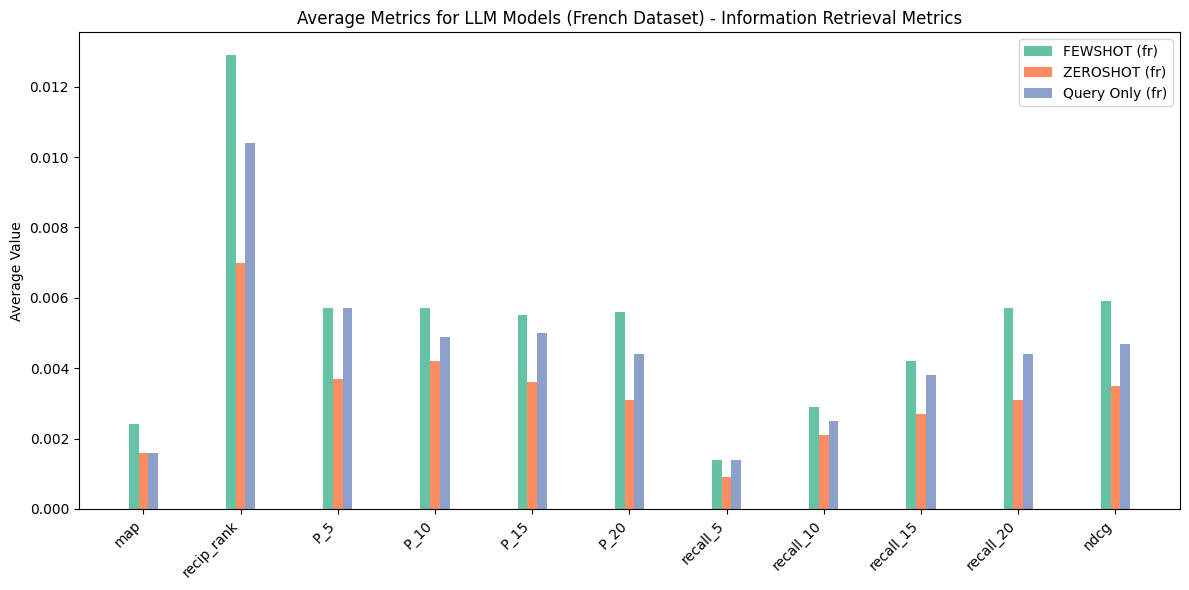

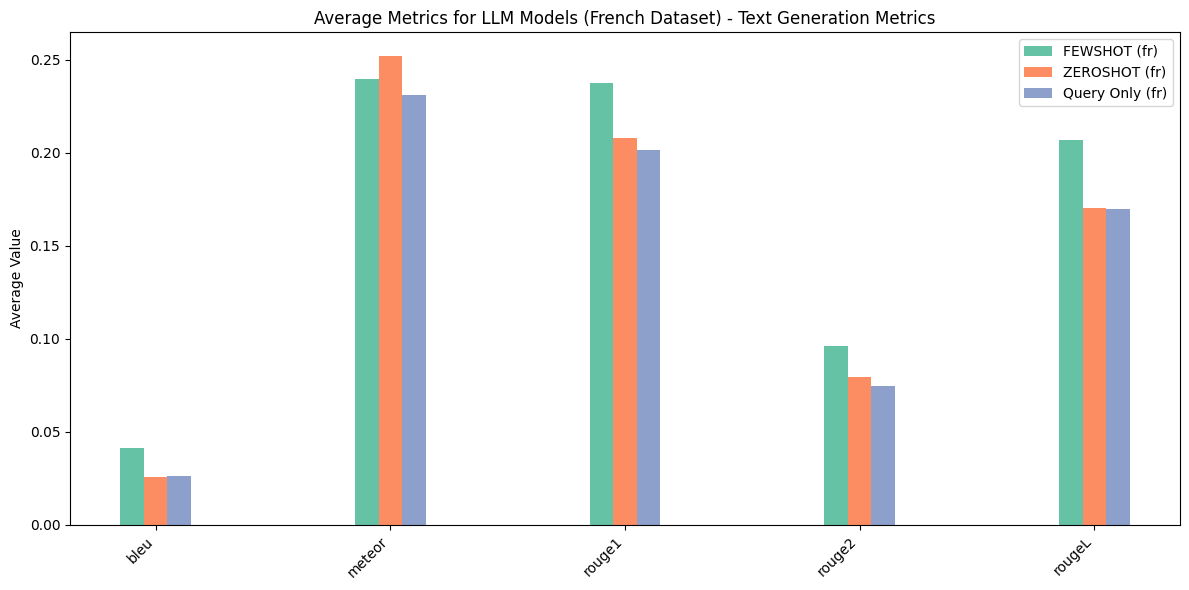


 Metric: map
  FEWSHOT (fr) vs ZEROSHOT (fr): t = 0.9723, p = 0.3860 NOT SIG
  FEWSHOT (fr) vs Query Only (fr): t = 1.2484, p = 0.2800 NOT SIG
  ZEROSHOT (fr) vs Query Only (fr): t = -0.0624, p = 0.9532 NOT SIG

 Metric: recip_rank
  FEWSHOT (fr) vs ZEROSHOT (fr): t = 1.9820, p = 0.1185 NOT SIG
  FEWSHOT (fr) vs Query Only (fr): t = 1.2842, p = 0.2684 NOT SIG
  ZEROSHOT (fr) vs Query Only (fr): t = -1.0472, p = 0.3541 NOT SIG

 Metric: P_5
  FEWSHOT (fr) vs ZEROSHOT (fr): t = 0.6928, p = 0.5266 NOT SIG
  FEWSHOT (fr) vs Query Only (fr): t = 0.0000, p = 1.0000 NOT SIG
  ZEROSHOT (fr) vs Query Only (fr): t = -0.7875, p = 0.4751 NOT SIG

 Metric: P_10
  FEWSHOT (fr) vs ZEROSHOT (fr): t = 0.7348, p = 0.5032 NOT SIG
  FEWSHOT (fr) vs Query Only (fr): t = 0.6426, p = 0.5555 NOT SIG
  ZEROSHOT (fr) vs Query Only (fr): t = -0.4651, p = 0.6660 NOT SIG

 Metric: P_15
  FEWSHOT (fr) vs ZEROSHOT (fr): t = 1.0895, p = 0.3372 NOT SIG
  FEWSHOT (fr) vs Query Only (fr): t = 0.3688, p = 0.7310 NOT SIG

In [85]:
A = ['map', 'recip_rank', 'P_5', 'P_10', 'P_15', 'P_20',
         'recall_5', 'recall_10', 'recall_15', 'recall_20', 'ndcg']
B=['bleu', 'meteor', 'rouge1', 'rouge2', 'rougeL']
labels  = ["FEWSHOT (fr)", "ZEROSHOT (fr)", "Query Only (fr)"]
filenames = ["RI_METRICS_FR_LLM_predictions_FEWSHOT_TOP5DOCS_TFIDF_CLEANED.txt", "RI_METRICS_FR_LLM_predictions_ZEROSHOT_TOP5DOCS_TFIDF_CLEANED.txt","RI_METRICS_FR_LLM_predictions_ZEROSHOT_QUERYONLY.txt"]  
plot_two_metric_sets(filenames,  labels, "Average Metrics for LLM Models (French Dataset)", A, B, True)


results = run_pairwise_t_tests(filenames, labels, A+B)



[{'map': 0.2057, 'recip_rank': 0.5103, 'P_5': 0.3456, 'P_10': 0.3357, 'P_15': 0.3266, 'P_20': 0.3139, 'P_30': 0.2093, 'P_100': 0.0628, 'P_200': 0.0314, 'P_500': 0.0126, 'P_1000': 0.0063, 'recall_5': 0.0909, 'recall_10': 0.1767, 'recall_15': 0.2578, 'recall_20': 0.3302, 'recall_30': 0.3302, 'recall_100': 0.3302, 'recall_200': 0.3302, 'recall_500': 0.3302, 'recall_1000': 0.3302, 'ndcg': 0.3376, 'bleu': 0.0714, 'meteor': 0.2694, 'rouge1': 0.29, 'rouge2': 0.118, 'rougeL': 0.2684}, {'map': 0.1988, 'recip_rank': 0.5051, 'P_5': 0.3395, 'P_10': 0.3297, 'P_15': 0.3201, 'P_20': 0.3102, 'P_30': 0.2068, 'P_100': 0.062, 'P_200': 0.031, 'P_500': 0.0124, 'P_1000': 0.0062, 'recall_5': 0.0896, 'recall_10': 0.1738, 'recall_15': 0.253, 'recall_20': 0.3265, 'recall_30': 0.3265, 'recall_100': 0.3265, 'recall_200': 0.3265, 'recall_500': 0.3265, 'recall_1000': 0.3265, 'ndcg': 0.3314, 'bleu': 0.0721, 'meteor': 0.2639, 'rouge1': 0.2888, 'rouge2': 0.1172, 'rougeL': 0.2638}, {'map': 0.2048, 'recip_rank': 0.518, 

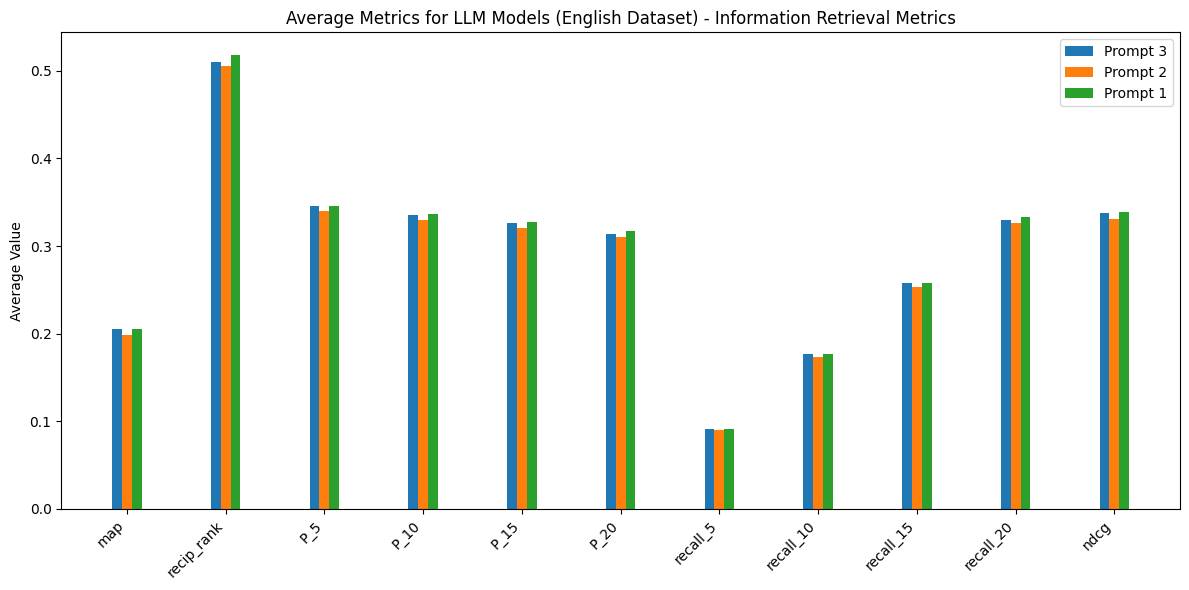

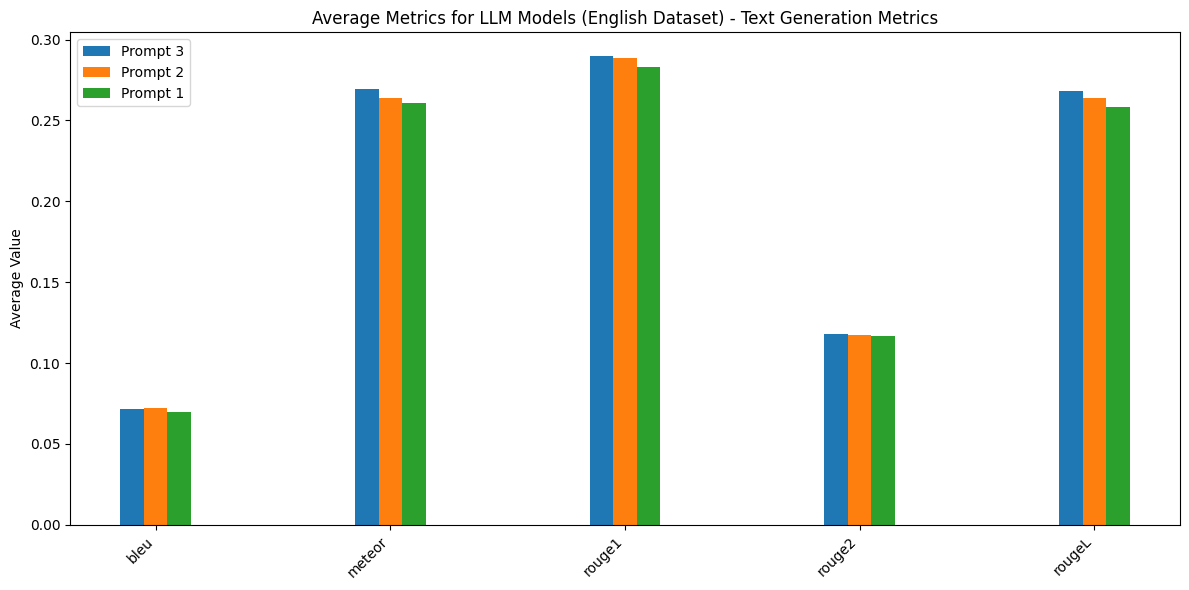


 Metric: map
  Prompt 3 vs Prompt 2: t = 4.6258, p = 0.0098 -------------------SIG
  Prompt 3 vs Prompt 1: t = 0.1846, p = 0.8625 NOT SIG
  Prompt 2 vs Prompt 1: t = -1.0667, p = 0.3462 NOT SIG

 Metric: recip_rank
  Prompt 3 vs Prompt 2: t = 0.3888, p = 0.7173 NOT SIG
  Prompt 3 vs Prompt 1: t = -0.4678, p = 0.6642 NOT SIG
  Prompt 2 vs Prompt 1: t = -0.5123, p = 0.6354 NOT SIG

 Metric: P_5
  Prompt 3 vs Prompt 2: t = 0.8726, p = 0.4321 NOT SIG
  Prompt 3 vs Prompt 1: t = -0.0342, p = 0.9744 NOT SIG
  Prompt 2 vs Prompt 1: t = -0.6400, p = 0.5570 NOT SIG

 Metric: P_10
  Prompt 3 vs Prompt 2: t = 1.0834, p = 0.3396 NOT SIG
  Prompt 3 vs Prompt 1: t = -0.1396, p = 0.8958 NOT SIG
  Prompt 2 vs Prompt 1: t = -0.9109, p = 0.4139 NOT SIG

 Metric: P_15
  Prompt 3 vs Prompt 2: t = 1.8164, p = 0.1435 NOT SIG
  Prompt 3 vs Prompt 1: t = -0.1210, p = 0.9095 NOT SIG
  Prompt 2 vs Prompt 1: t = -1.1938, p = 0.2985 NOT SIG

 Metric: P_20
  Prompt 3 vs Prompt 2: t = 0.9115, p = 0.4136 NOT SIG
  

In [76]:
A = ['map', 'recip_rank', 'P_5', 'P_10', 'P_15', 'P_20',
         'recall_5', 'recall_10', 'recall_15', 'recall_20', 'ndcg']
B=['bleu', 'meteor', 'rouge1', 'rouge2', 'rougeL']
filenames = ["RI_METRICS_EN_LLM_predictions_FEWSHOT_TOP5DOCS_TFIDF_CLEANED_PROMPT3.txt","RI_METRICS_EN_LLM_predictions_FEWSHOT_TOP5DOCS_TFIDF_CLEANED_PROMPT2.txt","RI_METRICS_EN_LLM_predictions_FEWSHOT_TOP5DOCS_TFIDF_CLEANED.txt"] 
labels  = ["Prompt 3", "Prompt 2", "Prompt 1"]
plot_two_metric_sets(filenames,  labels, "Average Metrics for LLM Models (English Dataset)", A, B)
results = run_pairwise_t_tests(filenames, labels, A+B)

[{'map': 0.2027, 'recip_rank': 0.511, 'P_5': 0.3526, 'P_10': 0.3384, 'P_15': 0.3244, 'P_20': 0.3128, 'P_30': 0.2085, 'P_100': 0.0626, 'P_200': 0.0313, 'P_500': 0.0125, 'P_1000': 0.0063, 'recall_5': 0.0932, 'recall_10': 0.1783, 'recall_15': 0.2559, 'recall_20': 0.3285, 'recall_30': 0.3285, 'recall_100': 0.3285, 'recall_200': 0.3285, 'recall_500': 0.3285, 'recall_1000': 0.3285, 'ndcg': 0.3359, 'bleu': 0.0401, 'meteor': 0.1597, 'rouge1': 0.2287, 'rouge2': 0.0863, 'rougeL': 0.2092}, {'map': 0.204, 'recip_rank': 0.5054, 'P_5': 0.3663, 'P_10': 0.3404, 'P_15': 0.3224, 'P_20': 0.3085, 'P_30': 0.2057, 'P_100': 0.0617, 'P_200': 0.0309, 'P_500': 0.0123, 'P_1000': 0.0062, 'recall_5': 0.0967, 'recall_10': 0.1792, 'recall_15': 0.2543, 'recall_20': 0.3248, 'recall_30': 0.3248, 'recall_100': 0.3248, 'recall_200': 0.3248, 'recall_500': 0.3248, 'recall_1000': 0.3248, 'ndcg': 0.3354, 'bleu': 0.0398, 'meteor': 0.1981, 'rouge1': 0.2372, 'rouge2': 0.0879, 'rougeL': 0.2064}, {'map': 0.2048, 'recip_rank': 0.5

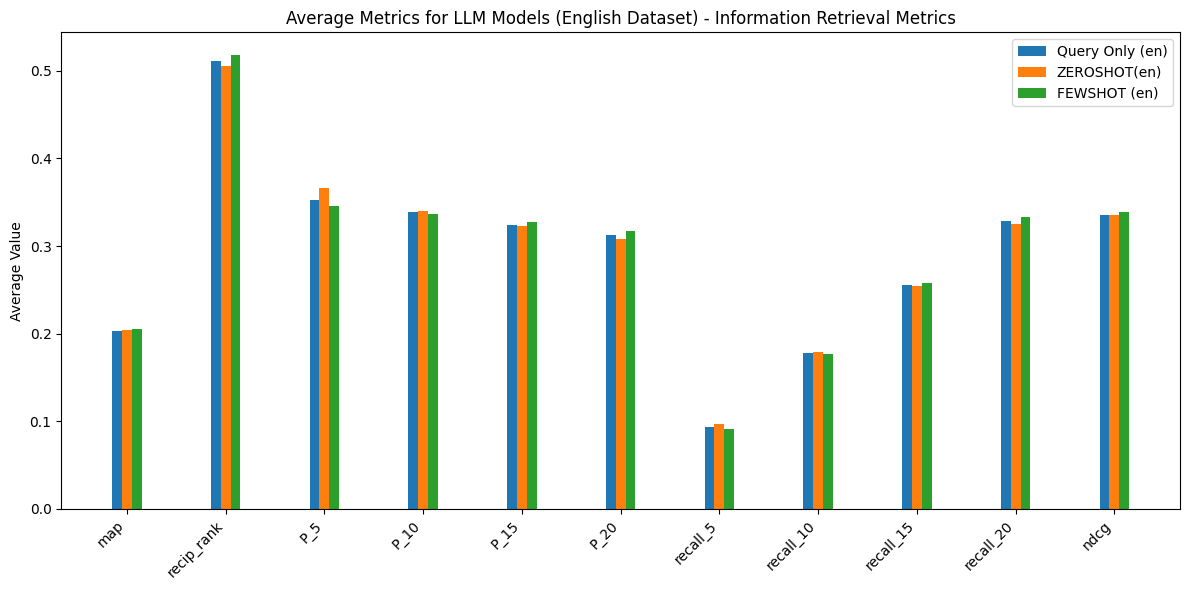

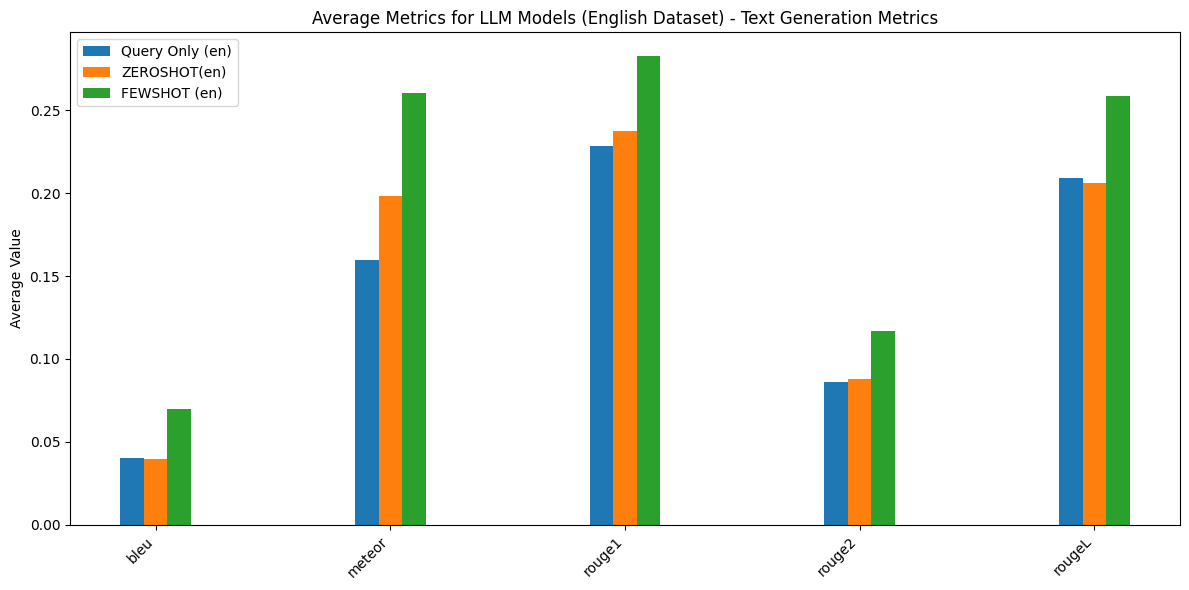


 Metric: map
  Query Only (en) vs ZEROSHOT(en): t = -0.2321, p = 0.8278 NOT SIG
  Query Only (en) vs FEWSHOT (en): t = -0.3658, p = 0.7330 NOT SIG
  ZEROSHOT(en) vs FEWSHOT (en): t = -0.1201, p = 0.9102 NOT SIG

 Metric: recip_rank
  Query Only (en) vs ZEROSHOT(en): t = 0.2147, p = 0.8405 NOT SIG
  Query Only (en) vs FEWSHOT (en): t = -0.2847, p = 0.7900 NOT SIG
  ZEROSHOT(en) vs FEWSHOT (en): t = -0.9786, p = 0.3832 NOT SIG

 Metric: P_5
  Query Only (en) vs ZEROSHOT(en): t = -1.2377, p = 0.2835 NOT SIG
  Query Only (en) vs FEWSHOT (en): t = 0.6970, p = 0.5242 NOT SIG
  ZEROSHOT(en) vs FEWSHOT (en): t = 1.6998, p = 0.1644 NOT SIG

 Metric: P_10
  Query Only (en) vs ZEROSHOT(en): t = -0.1990, p = 0.8520 NOT SIG
  Query Only (en) vs FEWSHOT (en): t = 0.1380, p = 0.8969 NOT SIG
  ZEROSHOT(en) vs FEWSHOT (en): t = 0.3145, p = 0.7689 NOT SIG

 Metric: P_15
  Query Only (en) vs ZEROSHOT(en): t = 0.2685, p = 0.8016 NOT SIG
  Query Only (en) vs FEWSHOT (en): t = -0.4183, p = 0.6972 NOT SIG
 

In [78]:
A = ['map', 'recip_rank', 'P_5', 'P_10', 'P_15', 'P_20',
         'recall_5', 'recall_10', 'recall_15', 'recall_20', 'ndcg']
B=['bleu', 'meteor', 'rouge1', 'rouge2', 'rougeL']
filenames = ["RI_METRICS_EN_LLM_predictions_ZEROSHOT_QUERYONLY.txt","RI_METRICS_EN_LLM_predictions_ZEROSHOT_TOP5DOCS_TFIDF_CLEANED.txt","RI_METRICS_EN_LLM_predictions_FEWSHOT_TOP5DOCS_TFIDF_CLEANED.txt"] 
labels  = ["Query Only (en)", "ZEROSHOT(en)", "FEWSHOT (en)"]
plot_two_metric_sets(filenames,  labels, "Average Metrics for LLM Models (English Dataset)", A, B)
results = run_pairwise_t_tests(filenames, labels, A+B)

[{'map': 0.0034, 'recip_rank': 0.0168, 'P_5': 0.0081, 'P_10': 0.007, 'P_15': 0.0064, 'P_20': 0.0061, 'P_30': 0.0041, 'P_100': 0.0012, 'P_200': 0.0006, 'P_500': 0.0002, 'P_1000': 0.0001, 'recall_5': 0.0021, 'recall_10': 0.0036, 'recall_15': 0.0049, 'recall_20': 0.0063, 'recall_30': 0.0063, 'recall_100': 0.0063, 'recall_200': 0.0063, 'recall_500': 0.0063, 'recall_1000': 0.0063, 'ndcg': 0.0071, 'bleu': 0.1975, 'meteor': 0.4567, 'rouge1': 0.4994, 'rouge2': 0.269, 'rougeL': 0.4912}, {'map': 0.0034, 'recip_rank': 0.015, 'P_5': 0.0077, 'P_10': 0.0072, 'P_15': 0.0069, 'P_20': 0.0064, 'P_30': 0.0043, 'P_100': 0.0013, 'P_200': 0.0006, 'P_500': 0.0003, 'P_1000': 0.0001, 'recall_5': 0.002, 'recall_10': 0.0037, 'recall_15': 0.0053, 'recall_20': 0.0065, 'recall_30': 0.0065, 'recall_100': 0.0065, 'recall_200': 0.0065, 'recall_500': 0.0065, 'recall_1000': 0.0065, 'ndcg': 0.0071, 'bleu': 0.1902, 'meteor': 0.4521, 'rouge1': 0.4971, 'rouge2': 0.2652, 'rougeL': 0.4859}, {'map': 0.0028, 'recip_rank': 0.010

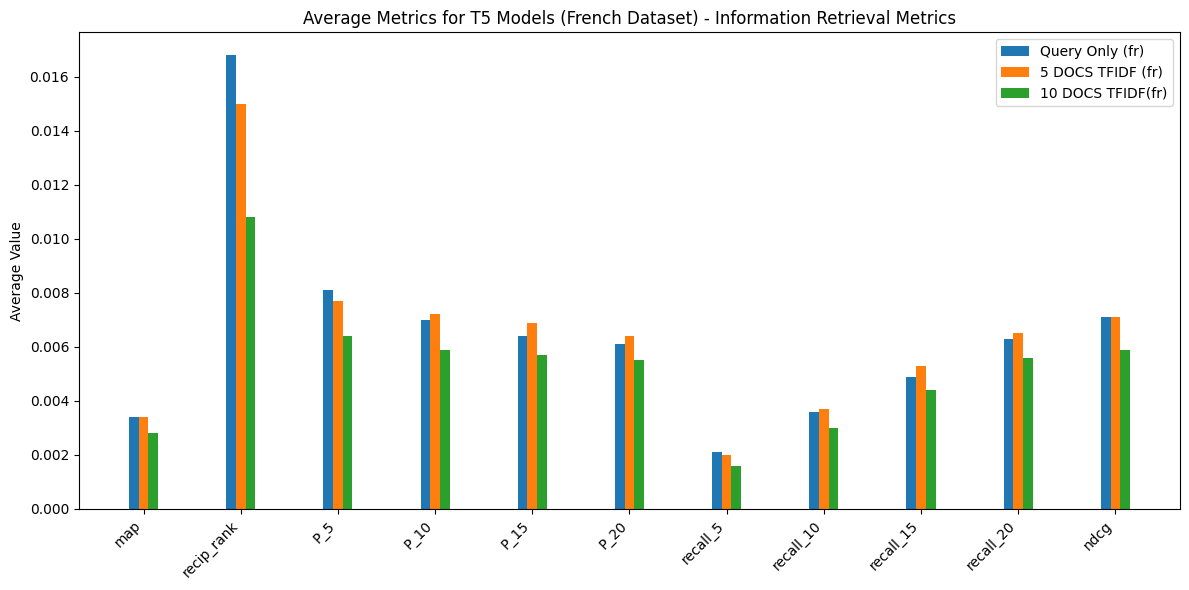

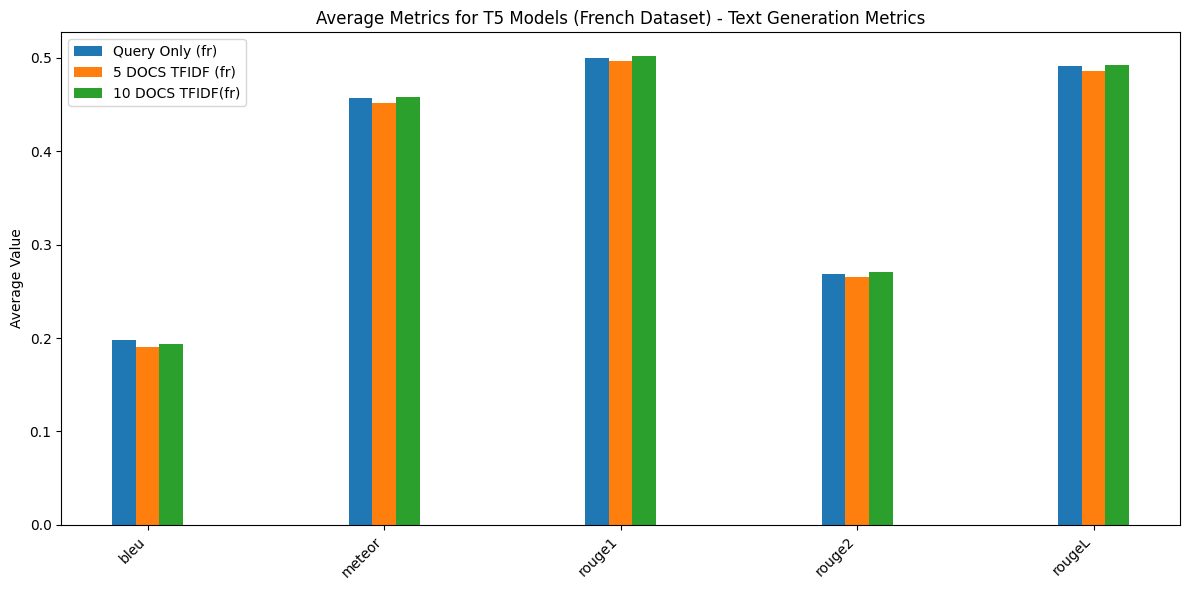


 Metric: map
  Query Only (fr) vs 5 DOCS TFIDF (fr): t = 0.0637, p = 0.9523 NOT SIG
  Query Only (fr) vs 10 DOCS TFIDF(fr): t = 1.2057, p = 0.2944 NOT SIG
  5 DOCS TFIDF (fr) vs 10 DOCS TFIDF(fr): t = 1.1078, p = 0.3301 NOT SIG

 Metric: recip_rank
  Query Only (fr) vs 5 DOCS TFIDF (fr): t = 0.4956, p = 0.6462 NOT SIG
  Query Only (fr) vs 10 DOCS TFIDF(fr): t = 1.6377, p = 0.1768 NOT SIG
  5 DOCS TFIDF (fr) vs 10 DOCS TFIDF(fr): t = 3.2090, p = 0.0326 -------------------SIG

 Metric: P_5
  Query Only (fr) vs 5 DOCS TFIDF (fr): t = 0.2213, p = 0.8357 NOT SIG
  Query Only (fr) vs 10 DOCS TFIDF(fr): t = 1.2948, p = 0.2651 NOT SIG
  5 DOCS TFIDF (fr) vs 10 DOCS TFIDF(fr): t = 1.6330, p = 0.1778 NOT SIG

 Metric: P_10
  Query Only (fr) vs 5 DOCS TFIDF (fr): t = -0.1065, p = 0.9203 NOT SIG
  Query Only (fr) vs 10 DOCS TFIDF(fr): t = 1.3959, p = 0.2352 NOT SIG
  5 DOCS TFIDF (fr) vs 10 DOCS TFIDF(fr): t = 1.7276, p = 0.1591 NOT SIG

 Metric: P_15
  Query Only (fr) vs 5 DOCS TFIDF (fr): t = -

In [79]:
A = ['map', 'recip_rank', 'P_5', 'P_10', 'P_15', 'P_20',
         'recall_5', 'recall_10', 'recall_15', 'recall_20', 'ndcg']
B=['bleu', 'meteor', 'rouge1', 'rouge2', 'rougeL']
filenames = ["RI_METRICS_FR_crossval_T5_SMALL_QUERY_ONLY.txt","RI_METRICS_FR_crossval_T5_SMALL_TOP5DOCS_TFIDF.txt","RI_METRICS_FR_crossval_T5_SMALL_TOP10DOCS_TFIDF.txt"] 
labels  = ["Query Only (fr)", "5 DOCS TFIDF (fr)", "10 DOCS TFIDF(fr)"]
plot_two_metric_sets(filenames,  labels, "Average Metrics for T5 Models (French Dataset)", A, B)
results = run_pairwise_t_tests(filenames, labels, A+B)

[{'map': 0.2024, 'recip_rank': 0.5174, 'P_5': 0.3683, 'P_10': 0.3434, 'P_15': 0.3269, 'P_20': 0.3114, 'P_30': 0.2076, 'P_100': 0.0623, 'P_200': 0.0311, 'P_500': 0.0125, 'P_1000': 0.0062, 'recall_5': 0.0968, 'recall_10': 0.1808, 'recall_15': 0.2581, 'recall_20': 0.3273, 'recall_30': 0.3273, 'recall_100': 0.3273, 'recall_200': 0.3273, 'recall_500': 0.3273, 'recall_1000': 0.3273, 'ndcg': 0.3382, 'bleu': 0.1941, 'meteor': 0.446, 'rouge1': 0.4893, 'rouge2': 0.2419, 'rougeL': 0.4784}, {'map': 0.2035, 'recip_rank': 0.529, 'P_5': 0.3673, 'P_10': 0.3433, 'P_15': 0.3294, 'P_20': 0.3137, 'P_30': 0.2091, 'P_100': 0.0627, 'P_200': 0.0314, 'P_500': 0.0125, 'P_1000': 0.0063, 'recall_5': 0.0967, 'recall_10': 0.1806, 'recall_15': 0.2596, 'recall_20': 0.3294, 'recall_30': 0.3294, 'recall_100': 0.3294, 'recall_200': 0.3294, 'recall_500': 0.3294, 'recall_1000': 0.3294, 'ndcg': 0.3409, 'bleu': 0.1911, 'meteor': 0.4438, 'rouge1': 0.4884, 'rouge2': 0.2405, 'rougeL': 0.4802}, {'map': 0.2032, 'recip_rank': 0.5

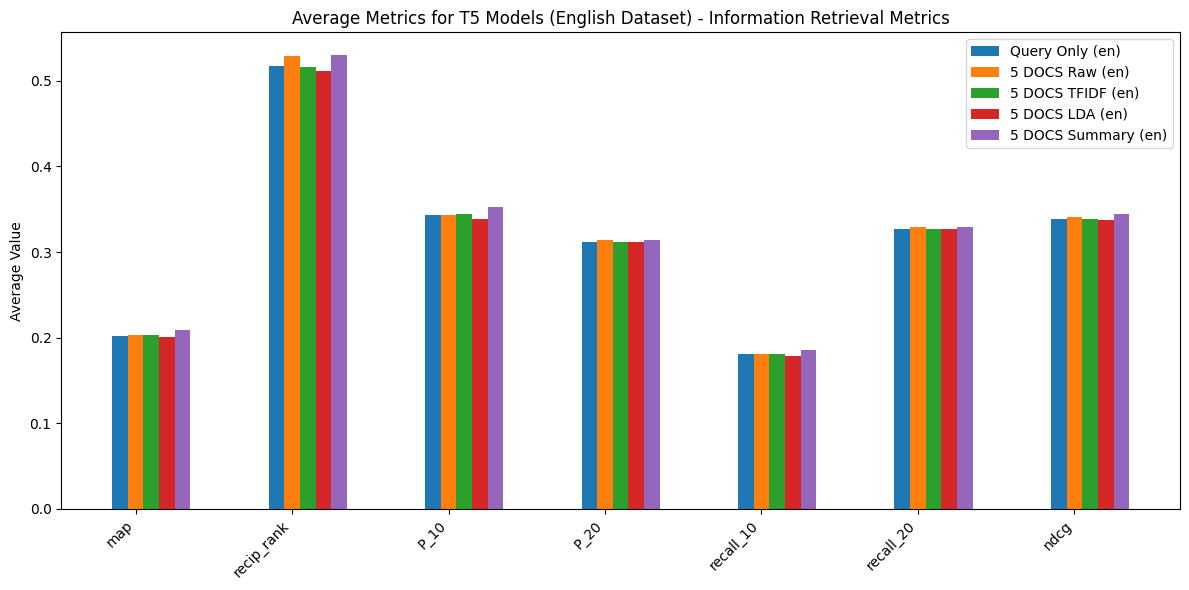

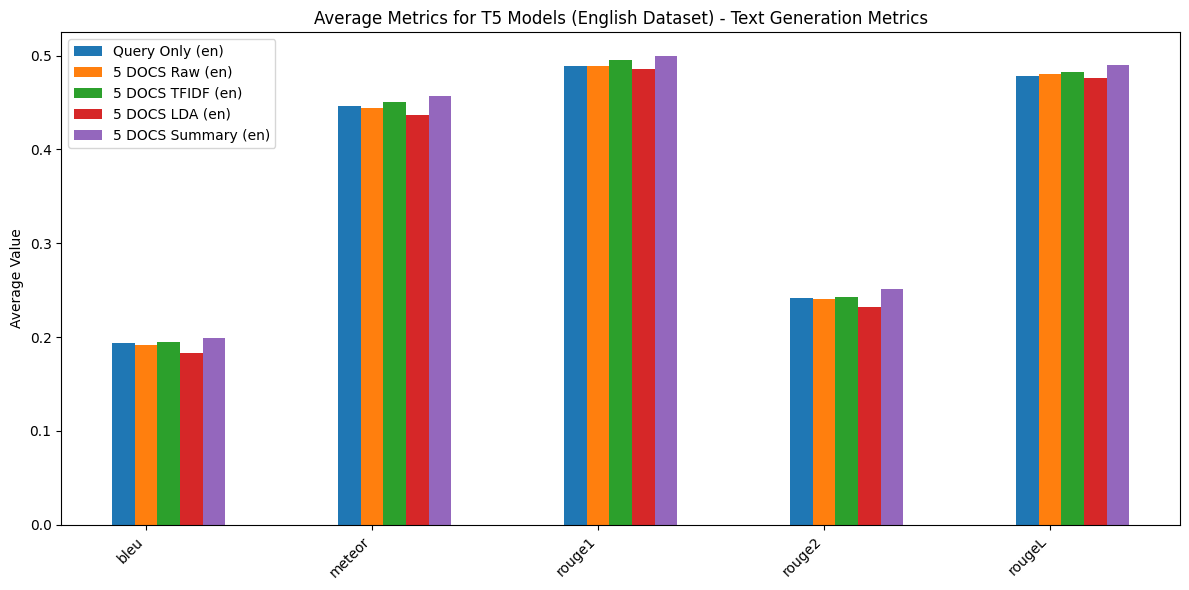


 Metric: map
  Query Only (en) vs 5 DOCS Raw (en): t = -0.1662, p = 0.8760 NOT SIG
  Query Only (en) vs 5 DOCS TFIDF (en): t = -0.1720, p = 0.8718 NOT SIG
  Query Only (en) vs 5 DOCS LDA (en): t = 0.3722, p = 0.7286 NOT SIG
  Query Only (en) vs 5 DOCS Summary (en): t = -2.4964, p = 0.0670 NOT SIG
  5 DOCS Raw (en) vs 5 DOCS TFIDF (en): t = 0.0451, p = 0.9662 NOT SIG
  5 DOCS Raw (en) vs 5 DOCS LDA (en): t = 0.5203, p = 0.6303 NOT SIG
  5 DOCS Raw (en) vs 5 DOCS Summary (en): t = -0.7149, p = 0.5142 NOT SIG
  5 DOCS TFIDF (en) vs 5 DOCS LDA (en): t = 0.4529, p = 0.6741 NOT SIG
  5 DOCS TFIDF (en) vs 5 DOCS Summary (en): t = -1.3797, p = 0.2398 NOT SIG
  5 DOCS LDA (en) vs 5 DOCS Summary (en): t = -1.3569, p = 0.2463 NOT SIG

 Metric: recip_rank
  Query Only (en) vs 5 DOCS Raw (en): t = -2.5566, p = 0.0629 NOT SIG
  Query Only (en) vs 5 DOCS TFIDF (en): t = 0.0925, p = 0.9308 NOT SIG
  Query Only (en) vs 5 DOCS LDA (en): t = 0.4481, p = 0.6773 NOT SIG
  Query Only (en) vs 5 DOCS Summary

In [86]:
A = ['map', 'recip_rank', 'P_10', 'P_20', 'recall_10', 'recall_20', 'ndcg']
B=['bleu', 'meteor', 'rouge1', 'rouge2', 'rougeL']
filenames = ["RI_METRICS_crossval_T5_SMALL_QUERY_ONLY.txt","RI_METRICS_crossval_T5_SMALL_TOP5DOCS.txt","RI_METRICS_crossval_T5_SMALL_TOP5DOCS_TFIDF.txt","RI_METRICS_crossval_T5_SMALL_TOP5DOCS_LDA.txt", "RI_METRICS_crossval_T5_TOP5DOCS_SUMMARIZED.txt"] 
labels  = ["Query Only (en)", "5 DOCS Raw (en)","5 DOCS TFIDF (en)", "5 DOCS LDA (en)", "5 DOCS Summary (en)"]
plot_two_metric_sets(filenames,  labels, "Average Metrics for T5 Models (English Dataset)", A, B)
results = run_pairwise_t_tests(filenames, labels, A+B)

In [87]:
def plot_two_metric_sets(filenames, labels, title, A, B, is_french=False):
    # Extract only the 'Average' metrics from each file
    all_averages = [extract_metrics_exact_keys(fname)["Average"] for fname in filenames]
    print(all_averages)

    # Choose color palette
    palette_name = "Set2" if is_french else "tab10"
    colors = plt.get_cmap(palette_name).colors

    # Extract numeric values from labels (e.g., "5 DOCS TFIDF (fr)" → 5)
    try:
        x_labels = [int(s.split()[0]) if s.split()[0].isdigit() else 0 for s in labels]
    except:
        x_labels = list(range(len(labels)))  # fallback if parsing fails

    def make_line_plot(metric_list, plot_title_suffix):
        # Filter metrics
        valid_metrics = [metric for metric in metric_list if metric in all_averages[0]]
        if not valid_metrics:
            print(f"No valid metrics found for {plot_title_suffix}. Skipping.")
            return

        # Prepare figure
        plt.figure(figsize=(10, 6))

        # Plot each metric as a line
        for i, metric in enumerate(valid_metrics):
            y_values = [model_avg[metric] for model_avg in all_averages]
            plt.plot(x_labels, y_values, marker='o', label=metric, color=colors[i % len(colors)])

        # Formatting
        plt.xticks(x_labels)
        plt.xlabel("Number of Top Documents")
        plt.ylabel("Metric Value")
        plt.title(f"{title} - {plot_title_suffix}")
        plt.legend(loc="best", fontsize="small")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plot A metrics
    make_line_plot(A, "Information Retrieval Metrics")
    # Plot B metrics
    make_line_plot(B, "Text Generation Metrics")


[{'map': 0.2024, 'recip_rank': 0.5174, 'P_5': 0.3683, 'P_10': 0.3434, 'P_15': 0.3269, 'P_20': 0.3114, 'P_30': 0.2076, 'P_100': 0.0623, 'P_200': 0.0311, 'P_500': 0.0125, 'P_1000': 0.0062, 'recall_5': 0.0968, 'recall_10': 0.1808, 'recall_15': 0.2581, 'recall_20': 0.3273, 'recall_30': 0.3273, 'recall_100': 0.3273, 'recall_200': 0.3273, 'recall_500': 0.3273, 'recall_1000': 0.3273, 'ndcg': 0.3382, 'bleu': 0.1941, 'meteor': 0.446, 'rouge1': 0.4893, 'rouge2': 0.2419, 'rougeL': 0.4784}, {'map': 0.2035, 'recip_rank': 0.529, 'P_5': 0.3673, 'P_10': 0.3433, 'P_15': 0.3294, 'P_20': 0.3137, 'P_30': 0.2091, 'P_100': 0.0627, 'P_200': 0.0314, 'P_500': 0.0125, 'P_1000': 0.0063, 'recall_5': 0.0967, 'recall_10': 0.1806, 'recall_15': 0.2596, 'recall_20': 0.3294, 'recall_30': 0.3294, 'recall_100': 0.3294, 'recall_200': 0.3294, 'recall_500': 0.3294, 'recall_1000': 0.3294, 'ndcg': 0.3409, 'bleu': 0.1911, 'meteor': 0.4438, 'rouge1': 0.4884, 'rouge2': 0.2405, 'rougeL': 0.4802}, {'map': 0.2065, 'recip_rank': 0.5

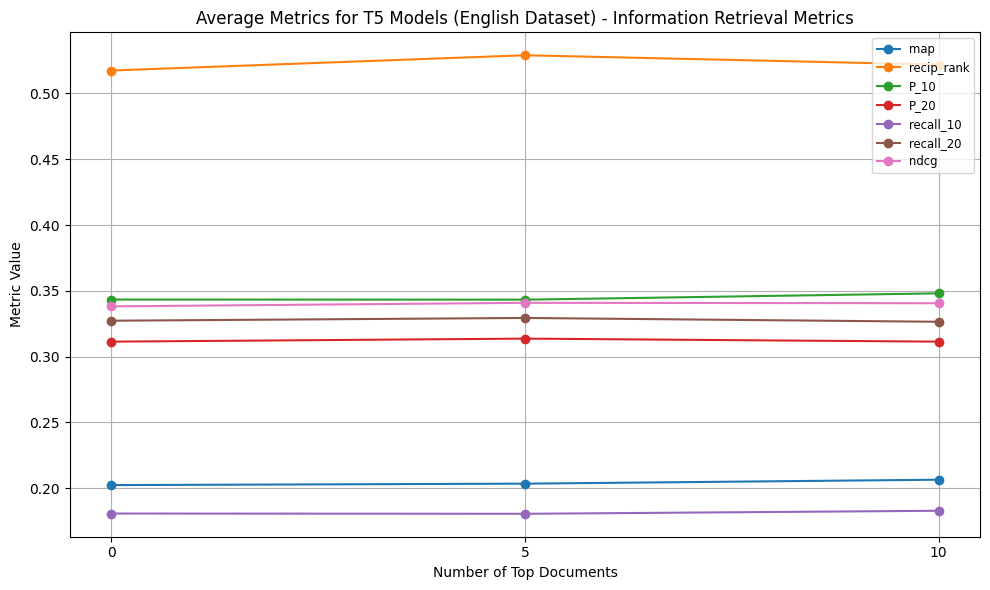

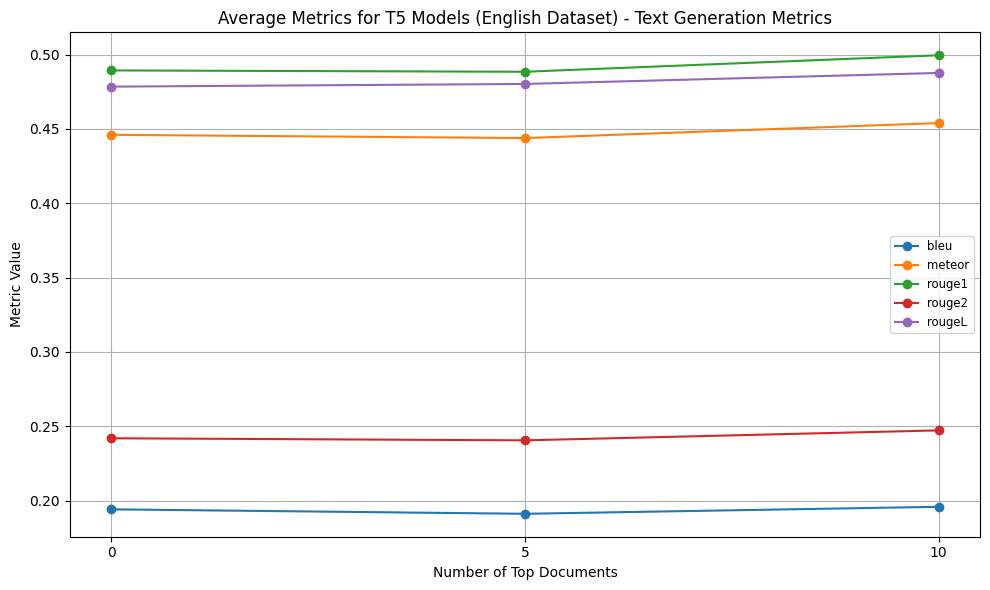


 Metric: map
  Query Only (en) vs 5 DOCS TFIDF (en): t = -0.1662, p = 0.8760 NOT SIG
  Query Only (en) vs 10 DOCS TFIDF (en): t = -0.6464, p = 0.5532 NOT SIG
  5 DOCS TFIDF (en) vs 10 DOCS TFIDF (en): t = -0.3760, p = 0.7260 NOT SIG

 Metric: recip_rank
  Query Only (en) vs 5 DOCS TFIDF (en): t = -2.5566, p = 0.0629 NOT SIG
  Query Only (en) vs 10 DOCS TFIDF (en): t = -0.2939, p = 0.7834 NOT SIG
  5 DOCS TFIDF (en) vs 10 DOCS TFIDF (en): t = 0.5681, p = 0.6004 NOT SIG

 Metric: P_10
  Query Only (en) vs 5 DOCS TFIDF (en): t = 0.0143, p = 0.9893 NOT SIG
  Query Only (en) vs 10 DOCS TFIDF (en): t = -0.5500, p = 0.6116 NOT SIG
  5 DOCS TFIDF (en) vs 10 DOCS TFIDF (en): t = -0.4336, p = 0.6869 NOT SIG

 Metric: P_20
  Query Only (en) vs 5 DOCS TFIDF (en): t = -0.4131, p = 0.7007 NOT SIG
  Query Only (en) vs 10 DOCS TFIDF (en): t = -0.0060, p = 0.9955 NOT SIG
  5 DOCS TFIDF (en) vs 10 DOCS TFIDF (en): t = 0.2680, p = 0.8020 NOT SIG

 Metric: recall_10
  Query Only (en) vs 5 DOCS TFIDF (en)

In [89]:
A = ['map', 'recip_rank', 'P_10', 'P_20', 'recall_10', 'recall_20', 'ndcg']
B=['bleu', 'meteor', 'rouge1', 'rouge2', 'rougeL']
filenames = ["RI_METRICS_crossval_T5_SMALL_QUERY_ONLY.txt","RI_METRICS_crossval_T5_SMALL_TOP5DOCS.txt","RI_METRICS_crossval_T5_SMALL_TOP10DOCS_TFIDF.txt"] 
labels  = ["Query Only (en)","5 DOCS TFIDF (en)", "10 DOCS TFIDF (en)"]
plot_two_metric_sets(filenames,  labels, "Average Metrics for T5 Models (English Dataset)", A, B)
results = run_pairwise_t_tests(filenames, labels, A+B)

[{'map': 0.0034, 'recip_rank': 0.0168, 'P_5': 0.0081, 'P_10': 0.007, 'P_15': 0.0064, 'P_20': 0.0061, 'P_30': 0.0041, 'P_100': 0.0012, 'P_200': 0.0006, 'P_500': 0.0002, 'P_1000': 0.0001, 'recall_5': 0.0021, 'recall_10': 0.0036, 'recall_15': 0.0049, 'recall_20': 0.0063, 'recall_30': 0.0063, 'recall_100': 0.0063, 'recall_200': 0.0063, 'recall_500': 0.0063, 'recall_1000': 0.0063, 'ndcg': 0.0071, 'bleu': 0.1975, 'meteor': 0.4567, 'rouge1': 0.4994, 'rouge2': 0.269, 'rougeL': 0.4912}, {'map': 0.0034, 'recip_rank': 0.015, 'P_5': 0.0077, 'P_10': 0.0072, 'P_15': 0.0069, 'P_20': 0.0064, 'P_30': 0.0043, 'P_100': 0.0013, 'P_200': 0.0006, 'P_500': 0.0003, 'P_1000': 0.0001, 'recall_5': 0.002, 'recall_10': 0.0037, 'recall_15': 0.0053, 'recall_20': 0.0065, 'recall_30': 0.0065, 'recall_100': 0.0065, 'recall_200': 0.0065, 'recall_500': 0.0065, 'recall_1000': 0.0065, 'ndcg': 0.0071, 'bleu': 0.1902, 'meteor': 0.4521, 'rouge1': 0.4971, 'rouge2': 0.2652, 'rougeL': 0.4859}, {'map': 0.0028, 'recip_rank': 0.010

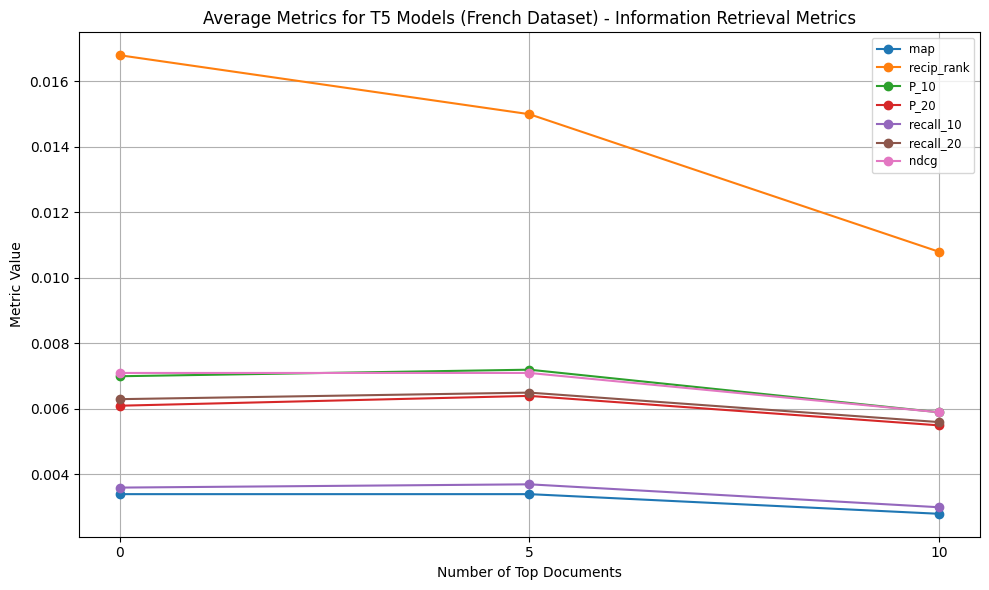

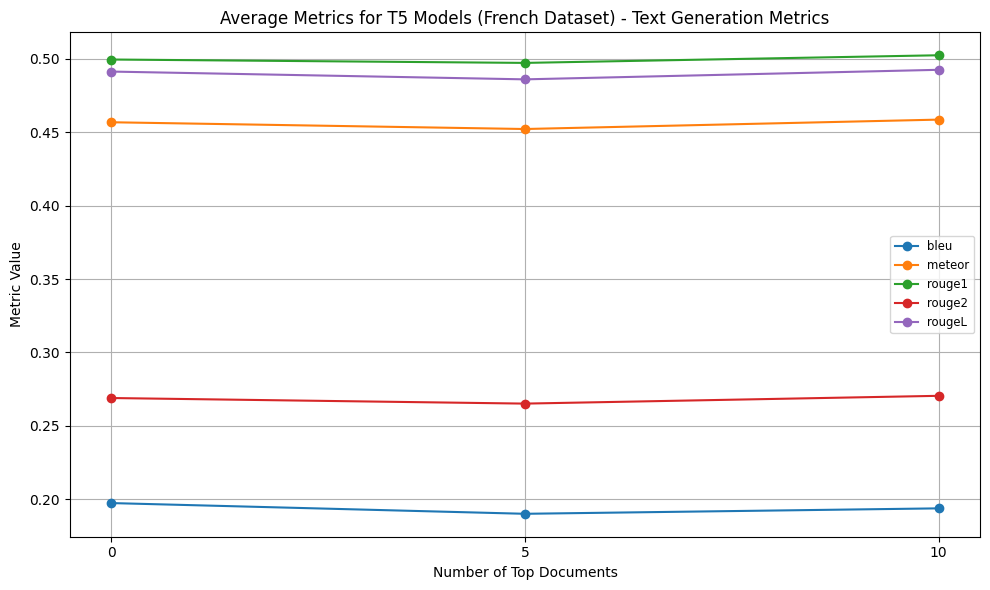


 Metric: map
  Query Only (fr) vs 5 DOCS TFIDF (fr): t = 0.0637, p = 0.9523 NOT SIG
  Query Only (fr) vs 10 DOCS TFIDF (fr): t = 1.2057, p = 0.2944 NOT SIG
  5 DOCS TFIDF (fr) vs 10 DOCS TFIDF (fr): t = 1.1078, p = 0.3301 NOT SIG

 Metric: recip_rank
  Query Only (fr) vs 5 DOCS TFIDF (fr): t = 0.4956, p = 0.6462 NOT SIG
  Query Only (fr) vs 10 DOCS TFIDF (fr): t = 1.6377, p = 0.1768 NOT SIG
  5 DOCS TFIDF (fr) vs 10 DOCS TFIDF (fr): t = 3.2090, p = 0.0326 -------------------SIG

 Metric: P_10
  Query Only (fr) vs 5 DOCS TFIDF (fr): t = -0.1065, p = 0.9203 NOT SIG
  Query Only (fr) vs 10 DOCS TFIDF (fr): t = 1.3959, p = 0.2352 NOT SIG
  5 DOCS TFIDF (fr) vs 10 DOCS TFIDF (fr): t = 1.7276, p = 0.1591 NOT SIG

 Metric: P_20
  Query Only (fr) vs 5 DOCS TFIDF (fr): t = -0.2523, p = 0.8132 NOT SIG
  Query Only (fr) vs 10 DOCS TFIDF (fr): t = 1.3345, p = 0.2529 NOT SIG
  5 DOCS TFIDF (fr) vs 10 DOCS TFIDF (fr): t = 1.2993, p = 0.2637 NOT SIG

 Metric: recall_10
  Query Only (fr) vs 5 DOCS TF

In [90]:
A = ['map', 'recip_rank', 'P_10', 'P_20', 'recall_10', 'recall_20', 'ndcg']
B=['bleu', 'meteor', 'rouge1', 'rouge2', 'rougeL']
filenames = ["RI_METRICS_FR_crossval_T5_SMALL_QUERY_ONLY.txt","RI_METRICS_FR_crossval_T5_SMALL_TOP5DOCS_TFIDF.txt","RI_METRICS_FR_crossval_T5_SMALL_TOP10DOCS_TFIDF.txt"] 
labels  = ["Query Only (fr)","5 DOCS TFIDF (fr)", "10 DOCS TFIDF (fr)"]
plot_two_metric_sets(filenames,  labels, "Average Metrics for T5 Models (French Dataset)", A, B)
results = run_pairwise_t_tests(filenames, labels, A+B)

In [8]:
import re
import json

import json
import re

def extract_selected_metrics(raw_metrics):
    target_metrics = ['meteor', 'rouge1', 'rouge2', 'rougeL', 'bleu']
    result = {}
    
    result["Average"] = {}
    for k, v in raw_metrics.items():
        if k.startswith("Averages/"):
            metric_name = k.split("_")[-1]
            if metric_name in target_metrics:
                result["Average"][metric_name] = v

    # Per fold
    for i in range(1, 6):
        key = f"Fold_{i}"
        result[f"Fold {i}"] = {}
        for k, v in raw_metrics.items():
            if k.startswith(f"{key}/eval/"):
                metric = k.split("/")[-1]
                if metric in target_metrics:
                    result[f"Fold {i}"][metric] = v
    return result


def update_metrics_in_file(metrics_dict, filepath):
    # Read original lines
    with open(filepath, "r") as f:
        lines = f.readlines()

    # Build a map from fold label -> line index
    fold_lines = {}
    for i, line in enumerate(lines):
        match = re.match(r"^(Fold \d|Average):", line)
        if match:
            fold_label = match.group(1)
            fold_lines[fold_label] = i

    # Update the lines by appending the new metrics
    for fold_label, new_metrics in metrics_dict.items():
        if fold_label in fold_lines:
            line_idx = fold_lines[fold_label]
            original_line = lines[line_idx].strip()

            # Avoid duplicating existing metrics
            existing_keys = {kv.split(":")[0].strip() for kv in original_line.split(",")[1:]}
            to_add = [f"{k}: {v:.4f}" for k, v in new_metrics.items() if k not in existing_keys]

            if to_add:
                lines[line_idx] = original_line + ", " + ", ".join(to_add) + "\n"

    # Write back
    with open(filepath, "w") as f:
        f.writelines(lines)

    print(" Metrics appended successfully.")




In [27]:
# raw_metrics = {
#   "Averages/epoch": 30,
#   "Averages/eval_bleu": 0.1826410387391856,
#   "Averages/eval_loss": 0.491108649969101,
#   "Averages/eval_meteor": 0.4371465470271202,
#   "Averages/eval_rouge1": 0.4855108720893208,
#   "Averages/eval_rouge2": 0.23197845636750708,
#   "Averages/eval_rougeL": 0.4758105924165824,
#   "Averages/eval_runtime": 1.60926,
#   "Averages/eval_samples_per_second": 77.73400000000001,
#   "Averages/eval_steps_per_second": 2.5962,
#   "Fold_1/eval/epoch": 30,
#   "Fold_1/eval/eval_bleu": 0.18594487195574105,
#   "Fold_1/eval/eval_loss": 0.5172153115272522,
#   "Fold_1/eval/eval_meteor": 0.4258253334829576,
#   "Fold_1/eval/eval_rouge1": 0.4808612306793142,
#   "Fold_1/eval/eval_rouge2": 0.2315065025447109,
#   "Fold_1/eval/eval_rougeL": 0.4670373113433284,
#   "Fold_1/eval/eval_runtime": 1.5547,
#   "Fold_1/eval/eval_samples_per_second": 77.185,
#   "Fold_1/eval/eval_steps_per_second": 2.573,
#   "Fold_2/eval/epoch": 30,
#   "Fold_2/eval/eval_bleu": 0.1936225660525887,
#   "Fold_2/eval/eval_loss": 0.508323073387146,
#   "Fold_2/eval/eval_meteor": 0.4606869309595393,
#   "Fold_2/eval/eval_rouge1": 0.49703235062266754,
#   "Fold_2/eval/eval_rouge2": 0.26187573269934605,
#   "Fold_2/eval/eval_rougeL": 0.48803188291314126,
#   "Fold_2/eval/eval_runtime": 1.2772,
#   "Fold_2/eval/eval_samples_per_second": 93.957,
#   "Fold_2/eval/eval_steps_per_second": 3.132,
#   "Fold_3/eval/epoch": 30,
#   "Fold_3/eval/eval_bleu": 0.18455458792022789,
#   "Fold_3/eval/eval_loss": 0.4578440487384796,
#   "Fold_3/eval/eval_meteor": 0.4391563586856478,
#   "Fold_3/eval/eval_rouge1": 0.4771375534964355,
#   "Fold_3/eval/eval_rouge2": 0.230404433651611,
#   "Fold_3/eval/eval_rougeL": 0.4710707582892236,
#   "Fold_3/eval/eval_runtime": 2.2996,
#   "Fold_3/eval/eval_samples_per_second": 52.182,
#   "Fold_3/eval/eval_steps_per_second": 1.739,
#   "Fold_4/eval/epoch": 30,
#   "Fold_4/eval/eval_bleu": 0.1571904975902457,
#   "Fold_4/eval/eval_loss": 0.4855270087718963,
#   "Fold_4/eval/eval_meteor": 0.4115004182194104,
#   "Fold_4/eval/eval_rouge1": 0.4728309168353976,
#   "Fold_4/eval/eval_rouge2": 0.20509646289512456,
#   "Fold_4/eval/eval_rougeL": 0.46377411138885394,
#   "Fold_4/eval/eval_runtime": 1.5923,
#   "Fold_4/eval/eval_samples_per_second": 75.363,
#   "Fold_4/eval/eval_steps_per_second": 2.512,
#   "Fold_5/eval/epoch": 30,
#   "Fold_5/eval/eval_bleu": 0.19189267017712464,
#   "Fold_5/eval/eval_loss": 0.4866338074207306,
#   "Fold_5/eval/eval_meteor": 0.448563693788046,
#   "Fold_5/eval/eval_rouge1": 0.49969230881278925,
#   "Fold_5/eval/eval_rouge2": 0.2310091500467428,
#   "Fold_5/eval/eval_rougeL": 0.4891388981483647,
#   "Fold_5/eval/eval_runtime": 1.3225,
#   "Fold_5/eval/eval_samples_per_second": 89.983,
#   "Fold_5/eval/eval_steps_per_second": 3.025,
#   "_runtime": 2250.502912646,
#   "_step": 435,
#   "_timestamp": 1747001008.020899,
#   "_wandb.runtime": 2250,
#   "eval/bleu": 0.19189267017712464,
#   "eval/loss": 0.4866338074207306,
#   "eval/meteor": 0.448563693788046,
#   "eval/rouge1": 0.49969230881278925,
#   "eval/rouge2": 0.2310091500467428,
#   "eval/rougeL": 0.4891388981483647,
#   "eval/runtime": 1.3225,
#   "eval/samples_per_second": 89.983,
#   "eval/steps_per_second": 3.025,
#   "test/bleu": 0.19189267017712464,
#   "test/loss": 0.4866338074207306,
#   "test/meteor": 0.448563693788046,
#   "test/rouge1": 0.49969230881278925,
#   "test/rouge2": 0.2310091500467428,
#   "test/rougeL": 0.4891388981483647,
#   "test/runtime": 1.5865,
#   "test/samples_per_second": 75.008,
#   "test/steps_per_second": 2.521,
#   "total_flos": 1948921941196800,
#   "train/epoch": 30,
#   "train/global_step": 450,
#   "train/grad_norm": 0.7810171842575073,
#   "train/learning_rate": 0.0000011111111111111112,
#   "train/loss": 0.4781,
#   "train_loss": 1.1619893487294517,
#   "train_runtime": 526.7421,
#   "train_samples_per_second": 27.338,
#   "train_steps_per_second": 0.854
# }
# metrics_dict = extract_selected_metrics(raw_metrics)
# update_metrics_in_file(metrics_dict, "RI_METRICS_crossval_T5_SMALL_TOP5DOCS_LDA.txt")

 Metrics appended successfully.
